In [504]:
library(tidyverse)
library(lubridate)

library(assertr)

library(ggtext)


<br>&nbsp;
<h3>Error Checking &amp; Warnings</h3>

* Ideally correct errors here and write out corrected csv to file with a note
* TODO - log errors found and include error-checking code as part of pre-processing flow



<h3>Errors to Watch For</h3>

<b>Please document as not found and/or what corrected, so can trace back to original. 
Update as needed and mirror in final docs submitted with project.</b>

* "Computing" (or "Computing Studies" or "Computing (New)") ... included in list of subjects
    * need to decide if files will be excluded or included with a flag to track changes in subjects offered
* Each subject and grade listed only once per gender
* proportions of male/female add up to 1
<br />


<h3>Warning Only Needed</h3>

<b>Need only document if triggered.</b>

* All values for a subject set to "-" or 0 (rare) -> translates to NAs if read in properly

In [606]:
files_to_verify <- list.files("sta_it_402/data", pattern = "higher", full.names = T, 
                              ignore.case = T, recursive = T) #%>%
                        #as.data.frame
files_to_verify

[1] "sta_it_402/data/grades/1986_Higher.csv"         
 [2] "sta_it_402/data/grades/1987_Higher.csv"         
 [3] "sta_it_402/data/grades/1988_Higher.csv"         
 [4] "sta_it_402/data/grades/1989_Higher.csv"         
 [5] "sta_it_402/data/grades/1990_Higher.csv"         
 [6] "sta_it_402/data/grades/1991_Higher.csv"         
 [7] "sta_it_402/data/grades/1992_Higher.csv"         
 [8] "sta_it_402/data/grades/1993_Higher.csv"         
 [9] "sta_it_402/data/grades/1994_Higher.csv"         
[10] "sta_it_402/data/grades/1995_Higher.csv"         
[11] "sta_it_402/data/grades/1999_Higher.csv"         
[12] "sta_it_402/data/grades/2000_NewHigher.csv"      
[13] "sta_it_402/data/grades/2005_AdvancedHigher.csv" 
[14] "sta_it_402/data/grades/2005_Higher_National.csv"
[15] "sta_it_402/data/grades/2012_AdvancedHigher.csv" 
[16] "sta_it_402/data/grades/2012_Higher.csv"

In [506]:
# check Computing in list of subjects

checkComputingListed <- 
    function(awardFile, glimpseContent = F) {
        awardData <- read_csv(awardFile, trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                            drop_na()
        print(awardFile)
        if (glimpseContent)
            print(glimpse(awardData))
        
        awardData %>%
            select(Subject) %>%

            filter(str_detect(Subject, "Computing")) %>%
            verify(nrow(.) > 0, error_fun = just_warn) %>%
            nrow # comment out this row to list subject names
    }

In [607]:
#lapply(files_to_verify, checkComputingListed)
#apply(files_to_verify, MARGIN = 2, FUN = checkComputingListed)
#Map(checkComputingListed, files_to_verify, T)

data.frame(sapply(files_to_verify, checkComputingListed))


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `female-Entries` = col_number(),
  `female-Passes` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1986_Higher.csv"
verification [nrow(.) > 0] failed! (1 failure)

    verb redux_fn   predicate column index value
1 verify       NA nrow(.) > 0     NA     1    NA



Warning message:
“assertr encountered errors”

── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1987_Higher.csv"
verification [nrow(.) > 0] failed! (1 failure)

    verb redux_fn   predicate column index value
1 verify       NA nrow(.) > 0     NA     1    NA



Warning message:
“assertr encountered errors”

── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1988_Higher.csv"
verification [nrow(.) > 0] failed! (1 failure)

    verb redux_fn   predicate column index value
1 verify       NA nrow(.) > 0     NA     1    NA



Warning message:
“assertr encountered errors”

── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1989_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1990_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1991_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1992_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1993_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1994_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1995_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  Subject = col_character(),
  `male-B` = col_character(),
  `male-C` = col_character(),
  `male-D` = col_character(),
  `female-B` = col_character(),
  `female-C` = col_character(),
  `female-D` = col_character(),
  `all-C` = col_character(),
  `all-D` = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1999_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2000_NewHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_double(),
  `all-B` = col_double(),
  `all-C` = col_double(),
  `all-Passes` = col_number(),
  `all-D` = col_double(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_AdvancedHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  `all-D` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_Higher_National.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_AdvancedHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_Higher.csv"


,sapply.files_to_verify..checkComputingListed.
,<int>
sta_it_402/data/grades/1986_Higher.csv,0
sta_it_402/data/grades/1987_Higher.csv,0
sta_it_402/data/grades/1988_Higher.csv,0
sta_it_402/data/grades/1989_Higher.csv,1
sta_it_402/data/grades/1990_Higher.csv,1
sta_it_402/data/grades/1991_Higher.csv,1
sta_it_402/data/grades/1992_Higher.csv,1
sta_it_402/data/grades/1993_Higher.csv,1
sta_it_402/data/grades/1994_Higher.csv,1


In [510]:

# warning only - document if necessary
# double-check for subjects with values all NA - does this mean subject being excluded or no one took it?

checkSubjectsWithNoEntries <- 
    function(awardFile, glimpseContent = F) {
        awardData <- read_csv(awardFile, trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                            drop_na()
        print(awardFile)
        if (glimpseContent)
            print(glimpse(awardData))
        
        bind_cols(
            awardData %>%
                mutate(row_id = row_number()) %>%
                select(row_id, Subject), 
                  
            awardData %>%
                select(-c(Subject, NumberOfCentres)) %>%
                mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
                mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
 
                assert_rows(num_row_NAs, 
                    within_bounds(0, length(colnames(.)), include.upper = F), everything(), error_fun = just_warn) %>% 
                    # comment out just_warn to stop execution on fail
                summarise(column_count = length(colnames(.)),
                          count_no_entries = num_row_NAs(.)) 
                  
        ) %>% # end bind_cols
            
        filter(count_no_entries == column_count) # comment out to print all
    }

In [608]:
suppressWarnings(data.frame(sapply(files_to_verify, checkSubjectsWithNoEntries)))


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `female-Entries` = col_number(),
  `female-Passes` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1986_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1987_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1988_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 1 time
         verb    redux_fn
1 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    20
  value
1    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1989_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 1 time
         verb    redux_fn
1 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    21
  value
1    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1990_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 1 time
         verb    redux_fn
1 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    23
  value
1    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1991_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 1 time
         verb    redux_fn
1 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    46
  value
1    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1992_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 1 time
         verb    redux_fn
1 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    57
  value
1    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1993_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 4 times
         verb    redux_fn
1 assert_rows num_row_NAs
2 assert_rows num_row_NAs
3 assert_rows num_row_NAs
4 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    17
2 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    73
3 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    74
4 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    75
  value
1    18
2    18
3    18
4    18




── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1994_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 10 times
         verb    redux_fn
1 assert_rows num_row_NAs
2 assert_rows num_row_NAs
3 assert_rows num_row_NAs
4 assert_rows num_row_NAs
5 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()     6
2 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    11
3 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    17
4 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    54
5 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    58
  value
1    18
2    18
3    18
4    18
5    18
  [omitted 5 rows]





── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1995_Higher.csv"
Data frame row reduction 'num_row_NAs' violates predicate 'within_bounds(0, length(colnames(.)), include.upper = F)' 20 times
         verb    redux_fn
1 assert_rows num_row_NAs
2 assert_rows num_row_NAs
3 assert_rows num_row_NAs
4 assert_rows num_row_NAs
5 assert_rows num_row_NAs
                                                 predicate        column index
1 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()     1
2 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()     7
3 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()     9
4 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    12
5 within_bounds(0, length(colnames(.)), include.upper = F) ~everything()    14
  value
1    18
2    18
3    18
4    18
5    18
  [omitted 15 rows]





── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  Subject = col_character(),
  `male-B` = col_character(),
  `male-C` = col_character(),
  `male-D` = col_character(),
  `female-B` = col_character(),
  `female-C` = col_character(),
  `female-D` = col_character(),
  `all-C` = col_character(),
  `all-D` = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1999_Higher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2000_NewHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_double(),
  `all-B` = col_double(),
  `all-C` = col_double(),
  `all-Passes` = col_number(),
  `all-D` = col_double(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_AdvancedHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  `all-D` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_Higher_National.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_AdvancedHigher.csv"



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_Higher.csv"


,sta_it_402.data.grades.1986_Higher.csv,sta_it_402.data.grades.1987_Higher.csv,sta_it_402.data.grades.1988_Higher.csv,sta_it_402.data.grades.1989_Higher.csv,sta_it_402.data.grades.1990_Higher.csv,sta_it_402.data.grades.1991_Higher.csv,sta_it_402.data.grades.1992_Higher.csv,sta_it_402.data.grades.1993_Higher.csv,sta_it_402.data.grades.1994_Higher.csv,sta_it_402.data.grades.1995_Higher.csv,sta_it_402.data.grades.1999_Higher.csv,sta_it_402.data.grades.2000_NewHigher.csv,sta_it_402.data.grades.2005_AdvancedHigher.csv,sta_it_402.data.grades.2005_Higher_National.csv,sta_it_402.data.grades.2012_AdvancedHigher.csv,sta_it_402.data.grades.2012_Higher.csv
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
row_id,,,20,21,23,46,57,"17, 73, 74, 75","6, 11, 17, 54, 58, 76, 77, 78, 79, 80","1, 7, 9, 12, 14, 17, 19, 30, 46, 49, 52, 54, 55, 66, 67, 68, 69, 70, 71, 72",,,,,,
Subject,,,Hebrew,Greek (Optional Paper III)*,Greek (Optional Paper III)*,Metalwork,Music Part II*,"Latin (Optional Paper III)*, Music Part II* , Music Part III* , Music Part IV*","Gáidhlig , Greek (Optional Paper III)* , Latin (Optional Paper III)* , Craft and Design , Home Economics (Fabrics and Fashion), Music Part II* , Music Part III* , Music Part IV* , Music Part V* , Music Part VI*","Classical Greek (Optional Paper III) , Gáidhlig , Gaelic (Learners) , Hebrew , Italian , Portuguese , Russian , Chemistry , Agricultural Science , Engineering , Horticultural Science , Navigation , Secretarial Studies (Audio-typewriting), Music (Practical Harmony)* , Music Part II* , Music Part III* , Music Part IV* , Music Part V* , Music Part VI* , Music",,,,,,
column_count,,,18,18,18,18,18,"18, 18, 18, 18","18, 18, 18, 18, 18, 18, 18, 18, 18, 18","18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18",,,,,,
count_no_entries,,,18,18,18,18,18,"18, 18, 18, 18","18, 18, 18, 18, 18, 18, 18, 18, 18, 18","18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18",,,,,,


In [595]:
# error checking - need to manually correct data if mismatch between breakdown by gender and totals found
# this case, if found, is relatively easy to fix

checkDistributionByGenderErrors <- 
    function(awardFile, glimpseContent = F) {
        awardData <- read_csv(awardFile, trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                            drop_na()
        print(awardFile)
        if (glimpseContent)
            print(glimpse(awardData))

        
        awardData %>%
            mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
            mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%

            mutate_at(vars(starts_with("male")), ~(. / `all-Entries`)) %>%
            mutate_at(vars(starts_with("female")), ~(. / `all-Entries`)) %>%
            select(-(starts_with("all") & !ends_with("-Entries"))) %>%

            pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "PercentageOfStudents") %>%
            separate("grade", c("gender", "grade")) %>%
            mutate_at(c("gender", "grade"), as.factor) %>%
            filter(!(gender %in% c("all")) & (grade %in% c("Entries"))) %>%

            group_by(Subject) %>%
            summarise(total = sum(PercentageOfStudents, na.rm = T)) %>%
            verify((total == 1.0) | (total == 0), error_fun = just_warn) %>% 

            mutate(DataError = if_else(((total == 1.0) | (total == 0)), FALSE, TRUE)) %>%
            filter(DataError == T) # confirmation only - comment out to print all
}


# %>%
#    select(-matches(redundant_column_flags)) 

In [609]:
# suppressWarnings(checkDistributionByGenderErrors("sta_it_402/data/grades/1989_Higher.csv")) #, T))

suppressWarnings(data.frame(sapply(files_to_verify, checkDistributionByGenderErrors)))



── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `female-Entries` = col_number(),
  `female-Passes` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1986_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1987_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1988_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1989_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1990_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1991_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1992_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1993_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1994_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1995_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_number(),
  Subject = col_character(),
  `male-B` = col_character(),
  `male-C` = col_character(),
  `male-D` = col_character(),
  `female-B` = col_character(),
  `female-C` = col_character(),
  `female-D` = col_character(),
  `all-C` = col_character(),
  `all-D` = col_character(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/1999_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2000_NewHigher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_double(),
  `all-B` = col_double(),
  `all-C` = col_double(),
  `all-Passes` = col_number(),
  `all-D` = col_double(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_AdvancedHigher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `all-Entries` = col_number(),
  `all-A` = col_number(),
  `all-B` = col_number(),
  `all-C` = col_number(),
  `all-Passes` = col_number(),
  `all-D` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2005_Higher_National.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_AdvancedHigher.csv"


`summarise()` ungrouping output (override with `.groups` argument)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  `male-Entries` = col_number(),
  `female-Entries` = col_number(),
  `all-Entries` = col_number(),
  `all-Passes` = col_number(),
  NumberOfCentres = col_double()
)
ℹ Use `spec()` for the full column specifications.




[1] "sta_it_402/data/grades/2012_Higher.csv"


`summarise()` ungrouping output (override with `.groups` argument)



,sta_it_402.data.grades.1986_Higher.csv,sta_it_402.data.grades.1987_Higher.csv,sta_it_402.data.grades.1988_Higher.csv,sta_it_402.data.grades.1989_Higher.csv,sta_it_402.data.grades.1990_Higher.csv,sta_it_402.data.grades.1991_Higher.csv,sta_it_402.data.grades.1992_Higher.csv,sta_it_402.data.grades.1993_Higher.csv,sta_it_402.data.grades.1994_Higher.csv,sta_it_402.data.grades.1995_Higher.csv,sta_it_402.data.grades.1999_Higher.csv,sta_it_402.data.grades.2000_NewHigher.csv,sta_it_402.data.grades.2005_AdvancedHigher.csv,sta_it_402.data.grades.2005_Higher_National.csv,sta_it_402.data.grades.2012_AdvancedHigher.csv,sta_it_402.data.grades.2012_Higher.csv
,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>,<named list>
Subject,,,,,,,,,,,,,,,,
total,,,,,,,,,,,,,,,,
DataError,,,,,,,,,,,,,,,,


In [544]:
redundant_column_flags <- c("-Passes", "-percentage*", "-COMP", "-PassesUngradedCourses")

[1] "-Passes"                "-percentage*"           "-COMP"                 
[4] "-PassesUngradedCourses"

<br /> &nbsp;<br />
<h3>1986-8</h3>

* Standard Grades only

* Ordinary Grade, Higher &amp; CSYS did not include Computing

<br />

* __NoAward__ calculated as diff b/n all entries and grades awarded. The value represents both those who did not achieve a named grade or did not take the assessment but were not withdrawn

<br />


* From 1999 to ?
    * Awards in Optional Papers, Music Practical Harmony and Music Parts II - VI are not expressed in terms of bands.



<br /> &nbsp; <br />

<h3>1989</h3>
<br /> &nbsp; <br />




In [529]:
higher_1989 <- read_csv("sta_it_402/data/grades/1989_Higher.csv", trim_ws = T) %>% #, skip_empty_rows = T) # NOT skipping empty rows... :(
                    drop_na()

glimpse(higher_1989)
head(higher_1989)
spec(higher_1989)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 56
Columns: 20
$ Subject          <chr> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <chr> "1,994", "4", "239", "2,890", "4,275", "7,523", "469…
$ `male-A`         <chr> "184", "2", "18", "232", "583", "1,240", "58", "148"…
$ `male-B`         <chr> "447", "1", "37", "633", "1,118", "1,848", "85", "36…
$ `male-C`         <chr> "691", "1", "73", "1,227", "1,186", "2,174", "145", …
$ `male-Passes`    <chr> "1,322", "4", "128", "2,092", "2,887", "5,262", "288…
$ `male-D`         <chr> "429", "-", "54", "615", "844", "1,472", "84", "319"…
$ `female-Entries` <chr> "2,509", "3", "1,149", "4,776", "8,552", "6,001", "1…
$ `female-A`       <chr> "188", "1", "72", "576", "853", "688", "10", "8", "1…
$ `female-B`       <chr> "469", "-", "206", "1,400", "1,953", "1,424", "22", …
$ `female-C`       <chr> "903", "2", "352", "1,949", "2,642", "1,875", "33", …
$ `female-Passes`  <chr> "1,560", "3", "630", "3,925", "5,448", "3,987", "65"…
$ `female-D`       <chr> "621",

Subject,male-Entries,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-A,female-B,female-C,female-Passes,female-D,all-Entries,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Accounting,"1,994",184,447,691,"1,322",429,"2,509",188,469,903,"1,560",621,"4,503",372,916,"1,594","2,882","1,050",432
Agricultural Science,4,2,1,1,4,-,3,1,-,2,3,-,7,3,1,3,7,-,2
"Anatomy, Physiology and Health",239,18,37,73,128,54,"1,149",72,206,352,630,279,"1,388",90,243,425,758,333,179
Art and Design,"2,890",232,633,"1,227","2,092",615,"4,776",576,"1,400","1,949","3,925",682,"7,666",808,"2,033","3,176","6,017","1,297",512
Biology,"4,275",583,"1,118","1,186","2,887",844,"8,552",853,"1,953","2,642","5,448","1,981","12,827","1,436","3,071","3,828","8,335","2,825",536
Chemistry,"7,523","1,240","1,848","2,174","5,262","1,472","6,001",688,"1,424","1,875","3,987","1,347","13,524","1,928","3,272","4,049","9,249","2,819",497


cols(
  Subject = col_character(),
  `male-Entries` = col_character(),
  `male-A` = col_character(),
  `male-B` = col_character(),
  `male-C` = col_character(),
  `male-Passes` = col_character(),
  `male-D` = col_character(),
  `female-Entries` = col_character(),
  `female-A` = col_character(),
  `female-B` = col_character(),
  `female-C` = col_character(),
  `female-Passes` = col_character(),
  `female-D` = col_character(),
  `all-Entries` = col_character(),
  `all-A` = col_character(),
  `all-B` = col_character(),
  `all-C` = col_character(),
  `all-Passes` = col_character(),
  `all-D` = col_character(),
  NumberOfCentres = col_character()
)

In [530]:
higher_1989 <- higher_1989 %>%
    distinct(across(everything()), .keep_all = TRUE)

# confirm all entries unique - Subject, (gender,) grade 
higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%

    assert_rows(col_concat, is_uniq, Subject, grade) %>%
    nrow

[1] 1008

In [531]:
# use parse_number (not parse_integer) to remove any formatting such as thousand separators. 
# convert all to x'ter first - some will be number, some character, but the former ensures it 
# reads exactly as stored in file, esp if you have set-up to auto-convert to factor
# final conversion to integer - they should all be integers - count of humans
# note however, at the point in the late 20-teens when the data is by percentage this should 
# probably include a check and change to round - NOTE TO SELF - update this once check done

higher_1989 <- higher_1989 %>%
    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.integer) 

glimpse(higher_1989)     
head(higher_1989)

Warning message:
“Problem with `mutate()` input `NumberOfCentres`.
ℹ NAs introduced by coercion
ℹ Input `NumberOfCentres` is `.Primitive("as.integer")(NumberOfCentres)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `male-Entries`.
ℹ 4 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 54  -- a number      -

ℹ Input `male-Entries` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“4 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 54  -- a number      -
”
Warning message:
“Problem with `mutate()` input `male-A`.
ℹ 14 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 26  -- a number      -
 27  -- a number      -
 31  -- a number      -
... ... ........ ......
See problems(...) for m

Warning message:
“Problem with `mutate()` input `all-B`.
ℹ 10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-B` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.
”
Warning message:
“Problem with `mutate()` input `all-C`.
ℹ 10 parsing failures.
row col expected actual
 21  -- a number      -
 23  -- a number      -
 31  -- a number      -
 38  -- a number      -
 39  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-C` is `(function (x, na = c("", "NA"), locale = default_locale(), trim

Rows: 56
Columns: 20
$ Subject          <fct> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <int> 1994, 4, 239, 2890, 4275, 7523, 469, 1579, 155, 2239…
$ `male-A`         <int> 184, 2, 18, 232, 583, 1240, 58, 148, 13, 344, 22, 11…
$ `male-B`         <int> 447, 1, 37, 633, 1118, 1848, 85, 364, 74, 573, 38, 2…
$ `male-C`         <int> 691, 1, 73, 1227, 1186, 2174, 145, 505, 38, 732, 47,…
$ `male-Passes`    <int> 1322, 4, 128, 2092, 2887, 5262, 288, 1017, 125, 1649…
$ `male-D`         <int> 429, NA, 54, 615, 844, 1472, 84, 319, 16, 371, 39, 2…
$ `female-Entries` <int> 2509, 3, 1149, 4776, 8552, 6001, 124, 158, 152, 1817…
$ `female-A`       <int> 188, 1, 72, 576, 853, 688, 10, 8, 17, 163, 2, 240, 2…
$ `female-B`       <int> 469, NA, 206, 1400, 1953, 1424, 22, 38, 61, 409, 4, …
$ `female-C`       <int> 903, 2, 352, 1949, 2642, 1875, 33, 59, 44, 665, 4, 5…
$ `female-Passes`  <int> 1560, 3, 630, 3925, 5448, 3987, 65, 105, 122, 1237, …
$ `female-D`       <int> 621, N

Subject,male-Entries,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-A,female-B,female-C,female-Passes,female-D,all-Entries,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Accounting,1994,184,447,691,1322,429,2509,188,469,903,1560,621,4503,372,916,1594,2882,1050,432
Agricultural Science,4,2,1,1,4,NA,3,1,NA,2,3,NA,7,3,1,3,7,NA,2
"Anatomy, Physiology and Health",239,18,37,73,128,54,1149,72,206,352,630,279,1388,90,243,425,758,333,179
Art and Design,2890,232,633,1227,2092,615,4776,576,1400,1949,3925,682,7666,808,2033,3176,6017,1297,512
Biology,4275,583,1118,1186,2887,844,8552,853,1953,2642,5448,1981,12827,1436,3071,3828,8335,2825,536
Chemistry,7523,1240,1848,2174,5262,1472,6001,688,1424,1875,3987,1347,13524,1928,3272,4049,9249,2819,497


In [532]:
# only need to watch empty entries, but need to corect those with mismatches

higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(gender == "all") %>%

    full_join(

        higher_1989 %>%
            pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
            separate("grade", c("gender", "grade")) %>%
            mutate_at(c("gender", "grade"), as.factor) %>%
            filter(gender %in% c("male", "female")) %>%

            group_by(Subject, grade) %>%
            summarise(TotalStudentsByGender = sum(NoOfStudents, na.rm = T)) 
    ) %>%

    filter((NoOfStudents != TotalStudentsByGender) | is.na(NoOfStudents) | is.na(TotalStudentsByGender))

tail(higher_1989)

`summarise()` regrouping output by 'Subject' (override with `.groups` argument)

Joining, by = c("Subject", "grade")



Subject,NumberOfCentres,gender,grade,NoOfStudents,TotalStudentsByGender
<fct>,<int>,<fct>,<fct>,<int>,<int>
Agricultural Science,2,all,D,NA,0
Greek (Optional Paper III)*,NA,all,Entries,NA,0
Greek (Optional Paper III)*,NA,all,A,NA,0
Greek (Optional Paper III)*,NA,all,B,NA,0
Greek (Optional Paper III)*,NA,all,C,NA,0
Greek (Optional Paper III)*,NA,all,Passes,NA,0
Greek (Optional Paper III)*,NA,all,D,NA,0
Hebrew,1,all,B,NA,0
Hebrew,1,all,C,NA,0


Subject,male-Entries,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-A,female-B,female-C,female-Passes,female-D,all-Entries,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Secretarial Studies (Audio-typewriting),121,8,26,45,79,25,4948,461,1324,1682,3467,846,5069,469,1350,1727,3546,871,386
Secretarial Studies (Word Processing),14,NA,6,3,9,4,490,60,114,169,343,91,504,60,120,172,352,95,41
Spanish,131,33,41,33,107,18,402,84,102,120,306,74,533,117,143,153,413,92,124
Swedish,NA,NA,NA,NA,NA,NA,6,4,1,1,6,NA,6,4,1,1,6,NA,6
Technical Drawing,1958,257,445,584,1286,426,171,17,26,58,101,45,2129,274,471,642,1387,471,377
Woodwork,99,10,22,33,65,22,9,NA,NA,5,5,3,108,10,22,38,70,25,34


In [547]:
tmp_df <- higher_1989 %>%
    select(-matches(redundant_column_flags)) 
tmp_df[is.na(tmp_df)] <- 0

higher_1989 <- bind_cols(higher_1989,
        
    tmp_df %>%
        mutate("male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
               "female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
               "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all") & !ends_with("-Entries"))), `+`))) %>%
        select(c("male-NoAward", "female-NoAward", "all-NoAward"))
    ) %>%

    relocate(`male-NoAward`, .after = `male-Entries`) %>%
    relocate(`female-NoAward`, .after = `female-Entries`) %>%
    relocate(`all-NoAward`, .after = `all-Entries`) 

tail(higher_1989)
rm(tmp_df)

Subject,male-Entries,male-NoAward,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-NoAward,⋯,female-Passes,female-D,all-Entries,all-NoAward,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Secretarial Studies (Audio-typewriting),121,17,8,26,45,79,25,4948,635,⋯,3467,846,5069,652,469,1350,1727,3546,871,386
Secretarial Studies (Word Processing),14,1,NA,6,3,9,4,490,56,⋯,343,91,504,57,60,120,172,352,95,41
Spanish,131,6,33,41,33,107,18,402,22,⋯,306,74,533,28,117,143,153,413,92,124
Swedish,NA,0,NA,NA,NA,NA,NA,6,0,⋯,6,NA,6,0,4,1,1,6,NA,6
Technical Drawing,1958,246,257,445,584,1286,426,171,25,⋯,101,45,2129,271,274,471,642,1387,471,377
Woodwork,99,12,10,22,33,65,22,9,1,⋯,5,3,108,13,10,22,38,70,25,34


In [548]:
# themes commented out only because not currently needed or swapping between values

dressCodeTheme <- 
        theme_bw() +
        #theme_void() + 
        theme(panel.grid.major.y = element_line(), #panel.grid.minor.y = element_blank(),
                panel.grid.major.x = element_blank(), #panel.grid.minor.x = element_blank(), 
                axis.text.x = element_text(size = 12), # angle = 0, vjust = 0.3),
                axis.text.y = element_text(size = 12),
                #plot.title = element_text(size = 16),
                legend.text = element_text(size = 10), legend.title = element_text(size = 14),
                strip.text = element_text(size = 18)
            ) 

In [624]:
# label_formatting_codes <- if_else(ordinary_grade_1986$Subject == "Computing", "red", "darkgrey")

label_formatting_codes <- higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    mutate(label_colour_code = if_else(str_detect(Subject, "Computing"), "red", "darkgrey")) %>%
    mutate(label_weighting = if_else(str_detect(Subject, "Computing"), "bold", "plain")) %>%

    select(Subject, gender, label_colour_code, label_weighting, NoOfStudents) %>%
    arrange(desc(NoOfStudents)) %>% # , Subject
    #filter(!is.na(NoOfStudents))
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..
    
label_formatting_codes
#fct_reorder(label_formatting_codes$Subject, label_formatting_codes$NoOfStudents, .desc = T)
#tail(label_formatting_codes, 15)

# doesn't match order obtained in ggplot
# not completely sure bfstudiut think it uses order rather than factor levels, so the manual arrange rather does the job
# but ony if NAs not filtered out... so this has something to do with the weird reordering...

Subject,gender,label_colour_code,label_weighting,NoOfStudents
<fct>,<fct>,<chr>,<chr>,<dbl>
English,all,darkgrey,plain,35423
Mathematics,all,darkgrey,plain,20053
Chemistry,all,darkgrey,plain,13524
Biology,all,darkgrey,plain,12827
Physics,all,darkgrey,plain,11893
Geography,all,darkgrey,plain,9084
Modern Studies,all,darkgrey,plain,7992
Art and Design,all,darkgrey,plain,7666
History (Alternative),all,darkgrey,plain,6279


In [550]:
computing_subject_labels <- higher_1989 %>%
    select(Subject) %>%
    filter(str_detect(Subject, "Computing")) %>%
    mutate_at(c("Subject"), as.character)  %>%
    as.vector(mode = "character")

computing_subject_labels

[1] "Computing Studies"

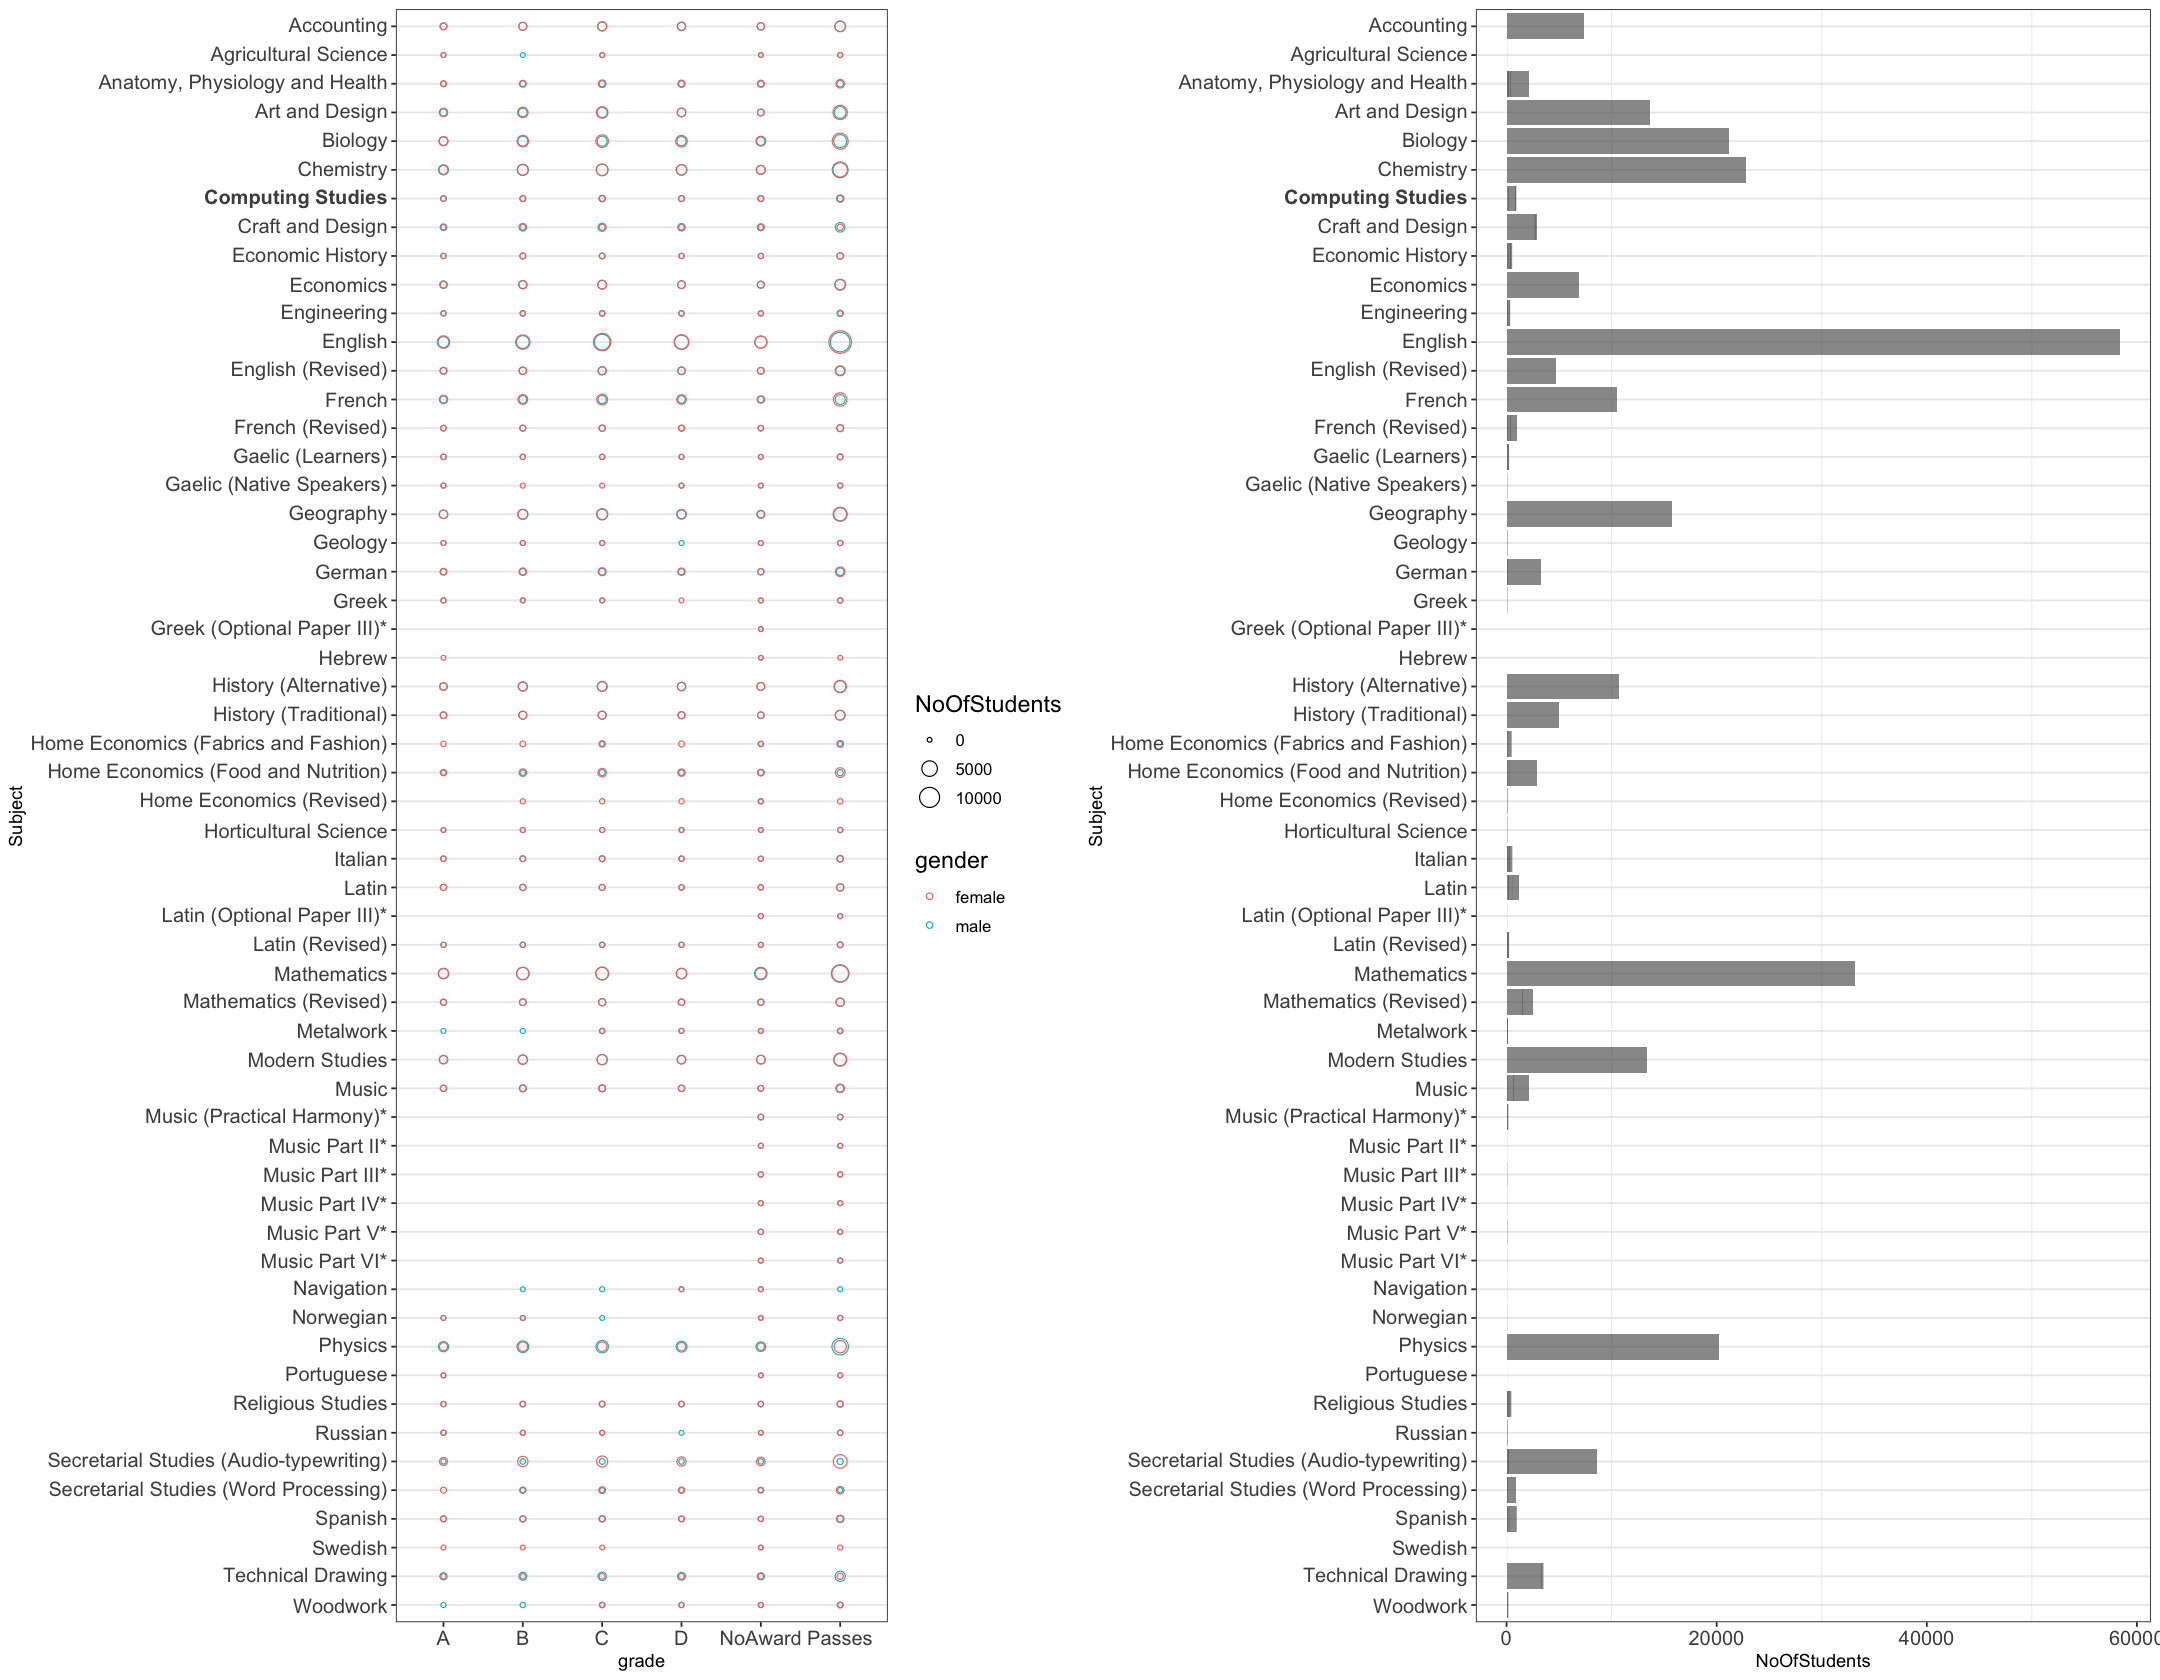

In [558]:
# second chart to draw attention to large disparity in entries per subject
# the bubble chart will need to use a log transform or similar to make the relative differences easier to read

# the default colour coding is non-ideal, and not just because it's pink-cyan but because it won't print well
# and is almost certainly not colour-blind proof. One of the things we'll need to decide on is a colour scheme.

# equivalent for element "Computing" on Subject axis in bold 

tmp_df <- higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(!(gender %in% c("all")) & !(grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) # instead of filter - want to keep labels in plot...
    

plot1 <- tmp_df %>%

    ggplot(aes(y = reorder(Subject, desc(Subject)), x = grade, colour = gender), fill = NA) +
        geom_point(aes(size = NoOfStudents), pch = 21, na.rm = T) + # , alpha = 0.65
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), "Computing Studies" = expression(bold("Computing Studies")), parse = TRUE)) +
        ylab("Subject") +
        dressCodeTheme 


plot2 <- tmp_df %>%
    
    ggplot(aes(y = reorder(Subject, desc(Subject)), x = NoOfStudents)) +
        geom_col(alpha = 0.65) +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), "Computing Studies" = expression(bold("Computing Studies")), parse = TRUE)) +
        ylab("Subject") +
        dressCodeTheme 


options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    
rm(tmp_df)


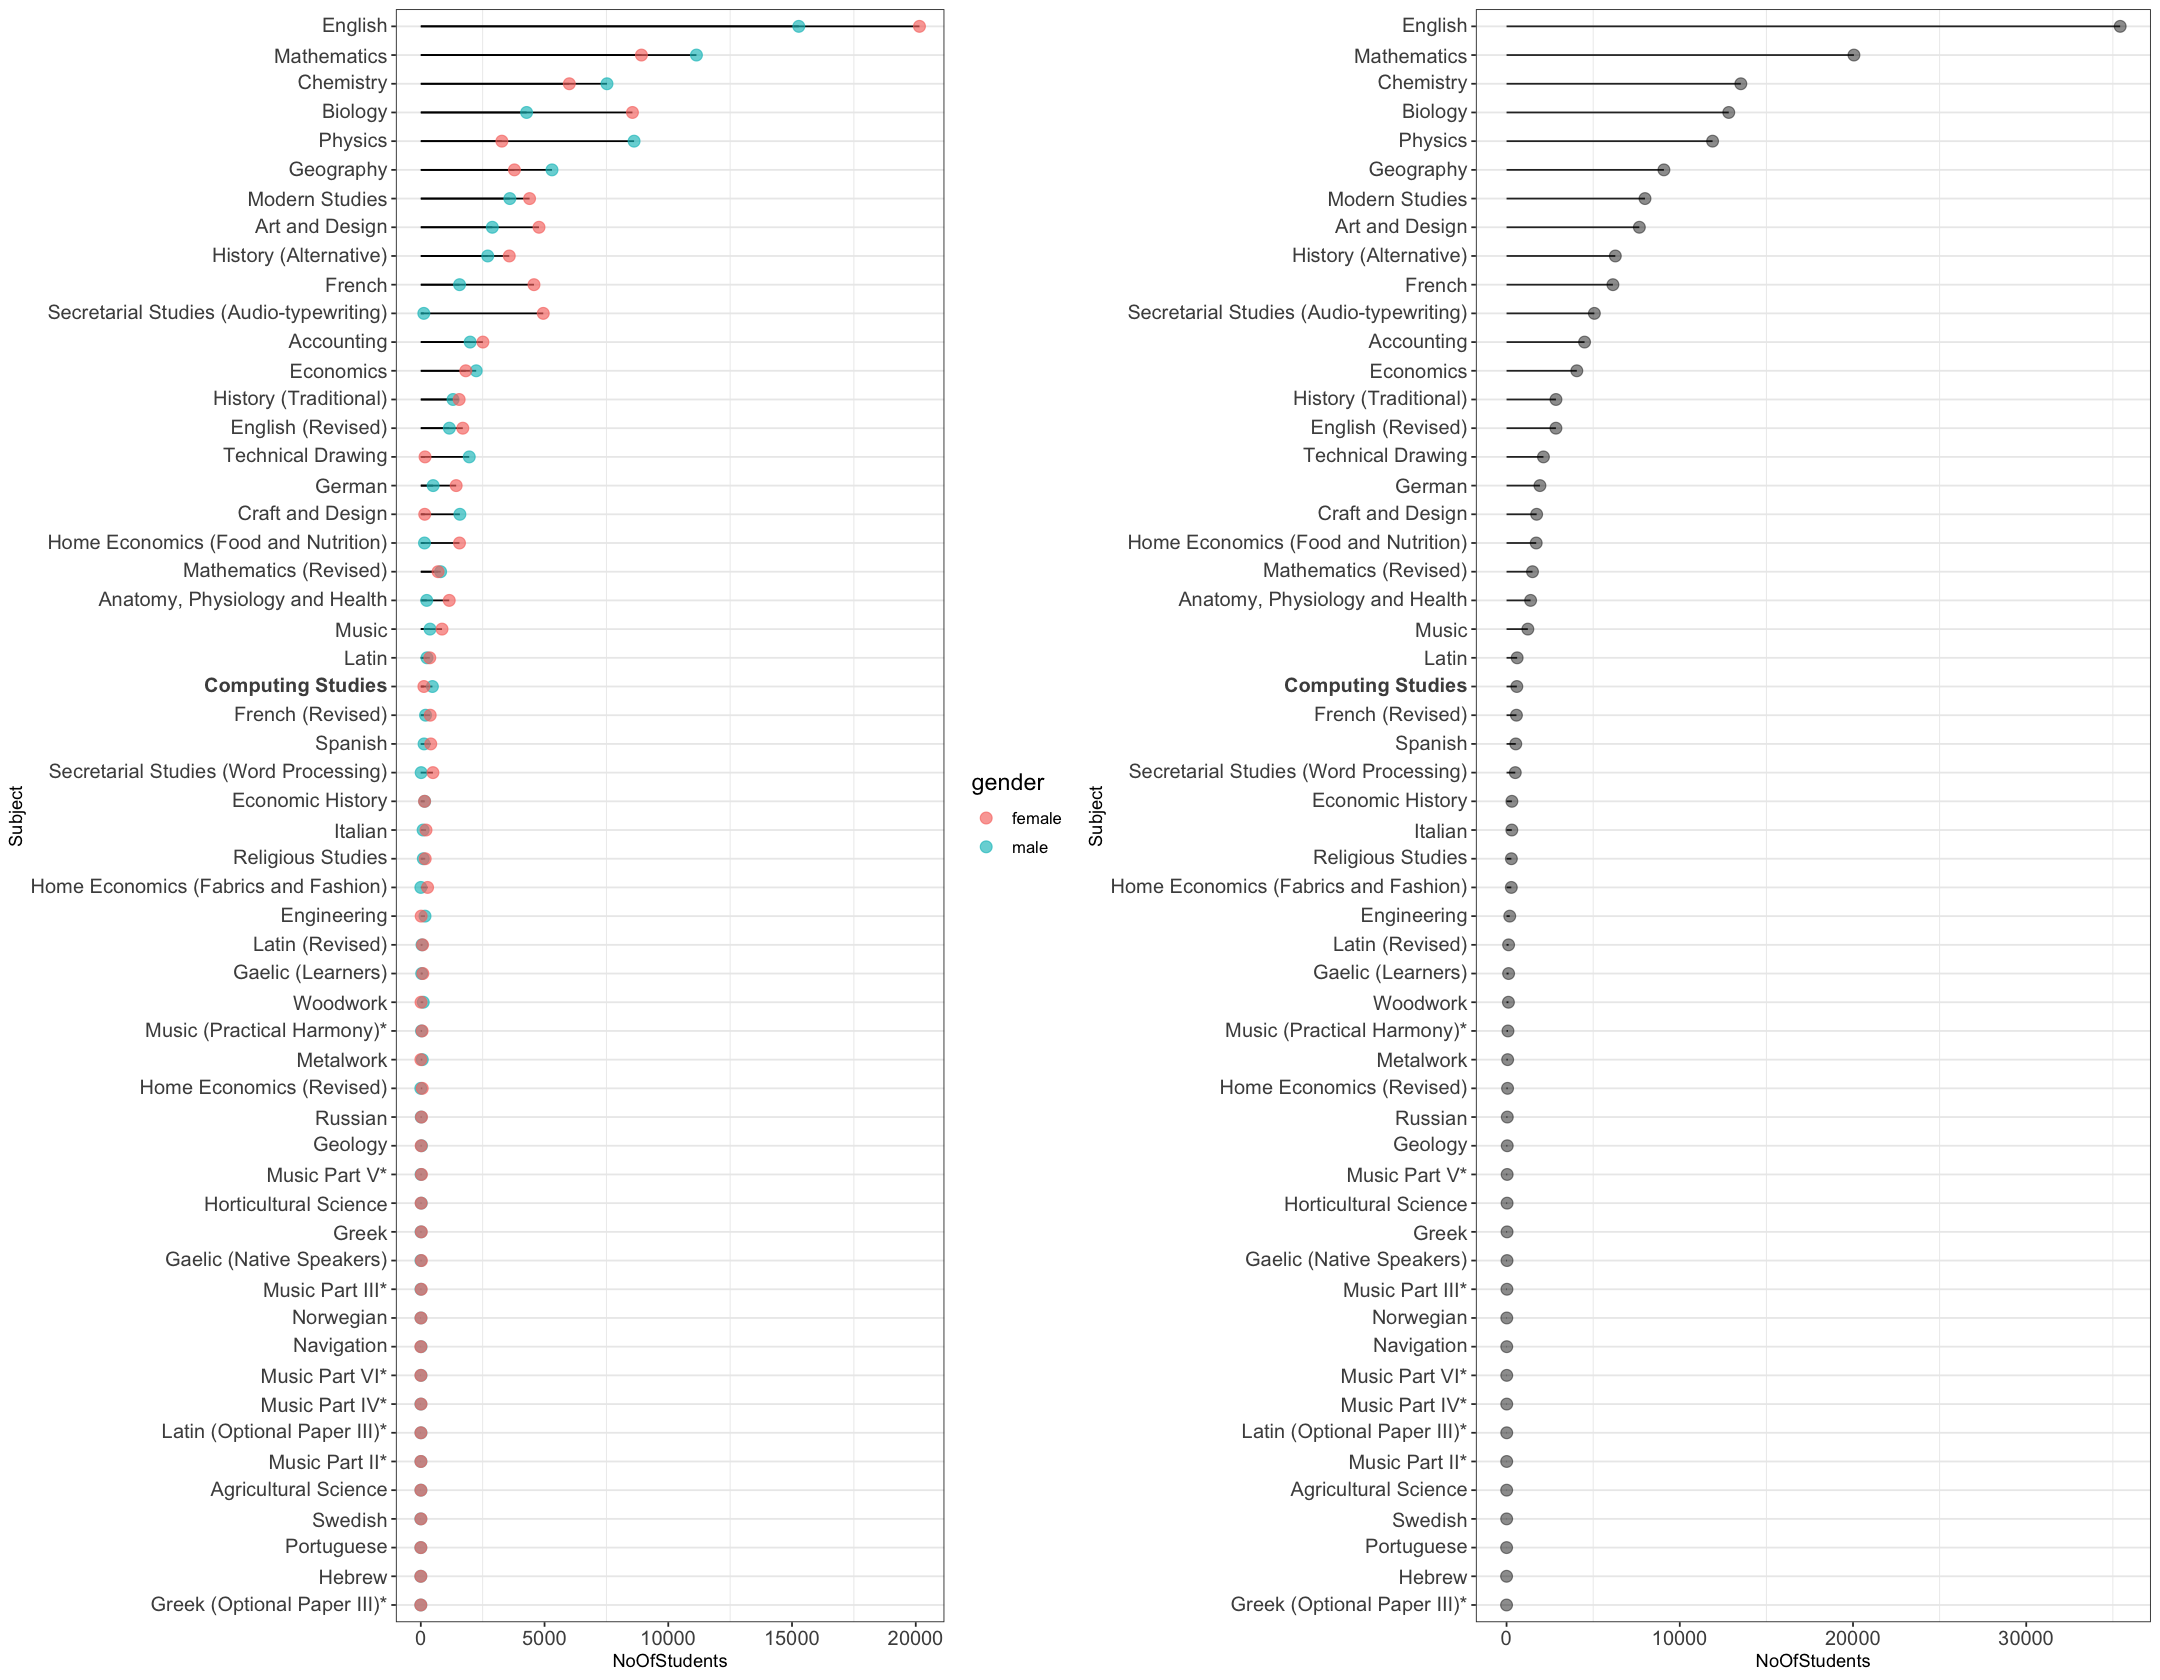

In [571]:
# order between the two y-axes may differ, depending on gender distribution - ordering before creating the plots is ignored

tmp_df <- higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    mutate(label_colour_code = if_else(Subject %in% c("Computing"), "red", "darkgrey")) %>%
    filter(grade %in% c("Entries")) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) # instead of filter - want to keep labels in plot...
    
    #mutate(Subject = fct_reorder(Subject, NoOfStudents, na.rm = T))
    #mutate(Subject = fct_reorder2(Subject, gender, desc(NoOfStudents)))



plot1 <- tmp_df %>%
    filter(!(gender %in% c("all"))) %>%

    ggplot(aes(y = fct_reorder(Subject, NoOfStudents), x = NoOfStudents)) +
    #ggplot(aes(y = reorder(Subject, NoOfStudents), x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject)) +
        geom_point(aes(colour = gender), size = 3, alpha = 0.65) +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), "Computing Studies" = expression(bold("Computing Studies")), parse = TRUE)) + # , limits = label_colour_codes$Subject) +
        ylab("Subject") +
        dressCodeTheme 

plot2 <- tmp_df %>%
    filter(gender %in% c("all")) %>%

    ggplot(aes(y = fct_reorder(Subject, NoOfStudents), x = NoOfStudents)) +
    #ggplot(aes(y = reorder(Subject, NoOfStudents), x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject), alpha = 0.85) +
        geom_point(size = 3, alpha = 0.45, show.legend = FALSE) + 
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), "Computing Studies" = expression(bold("Computing Studies")), parse = TRUE)) + #, limits = label_colour_codes$Subject) +
        ylab("Subject") +
        dressCodeTheme 


options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    
rm(tmp_df)


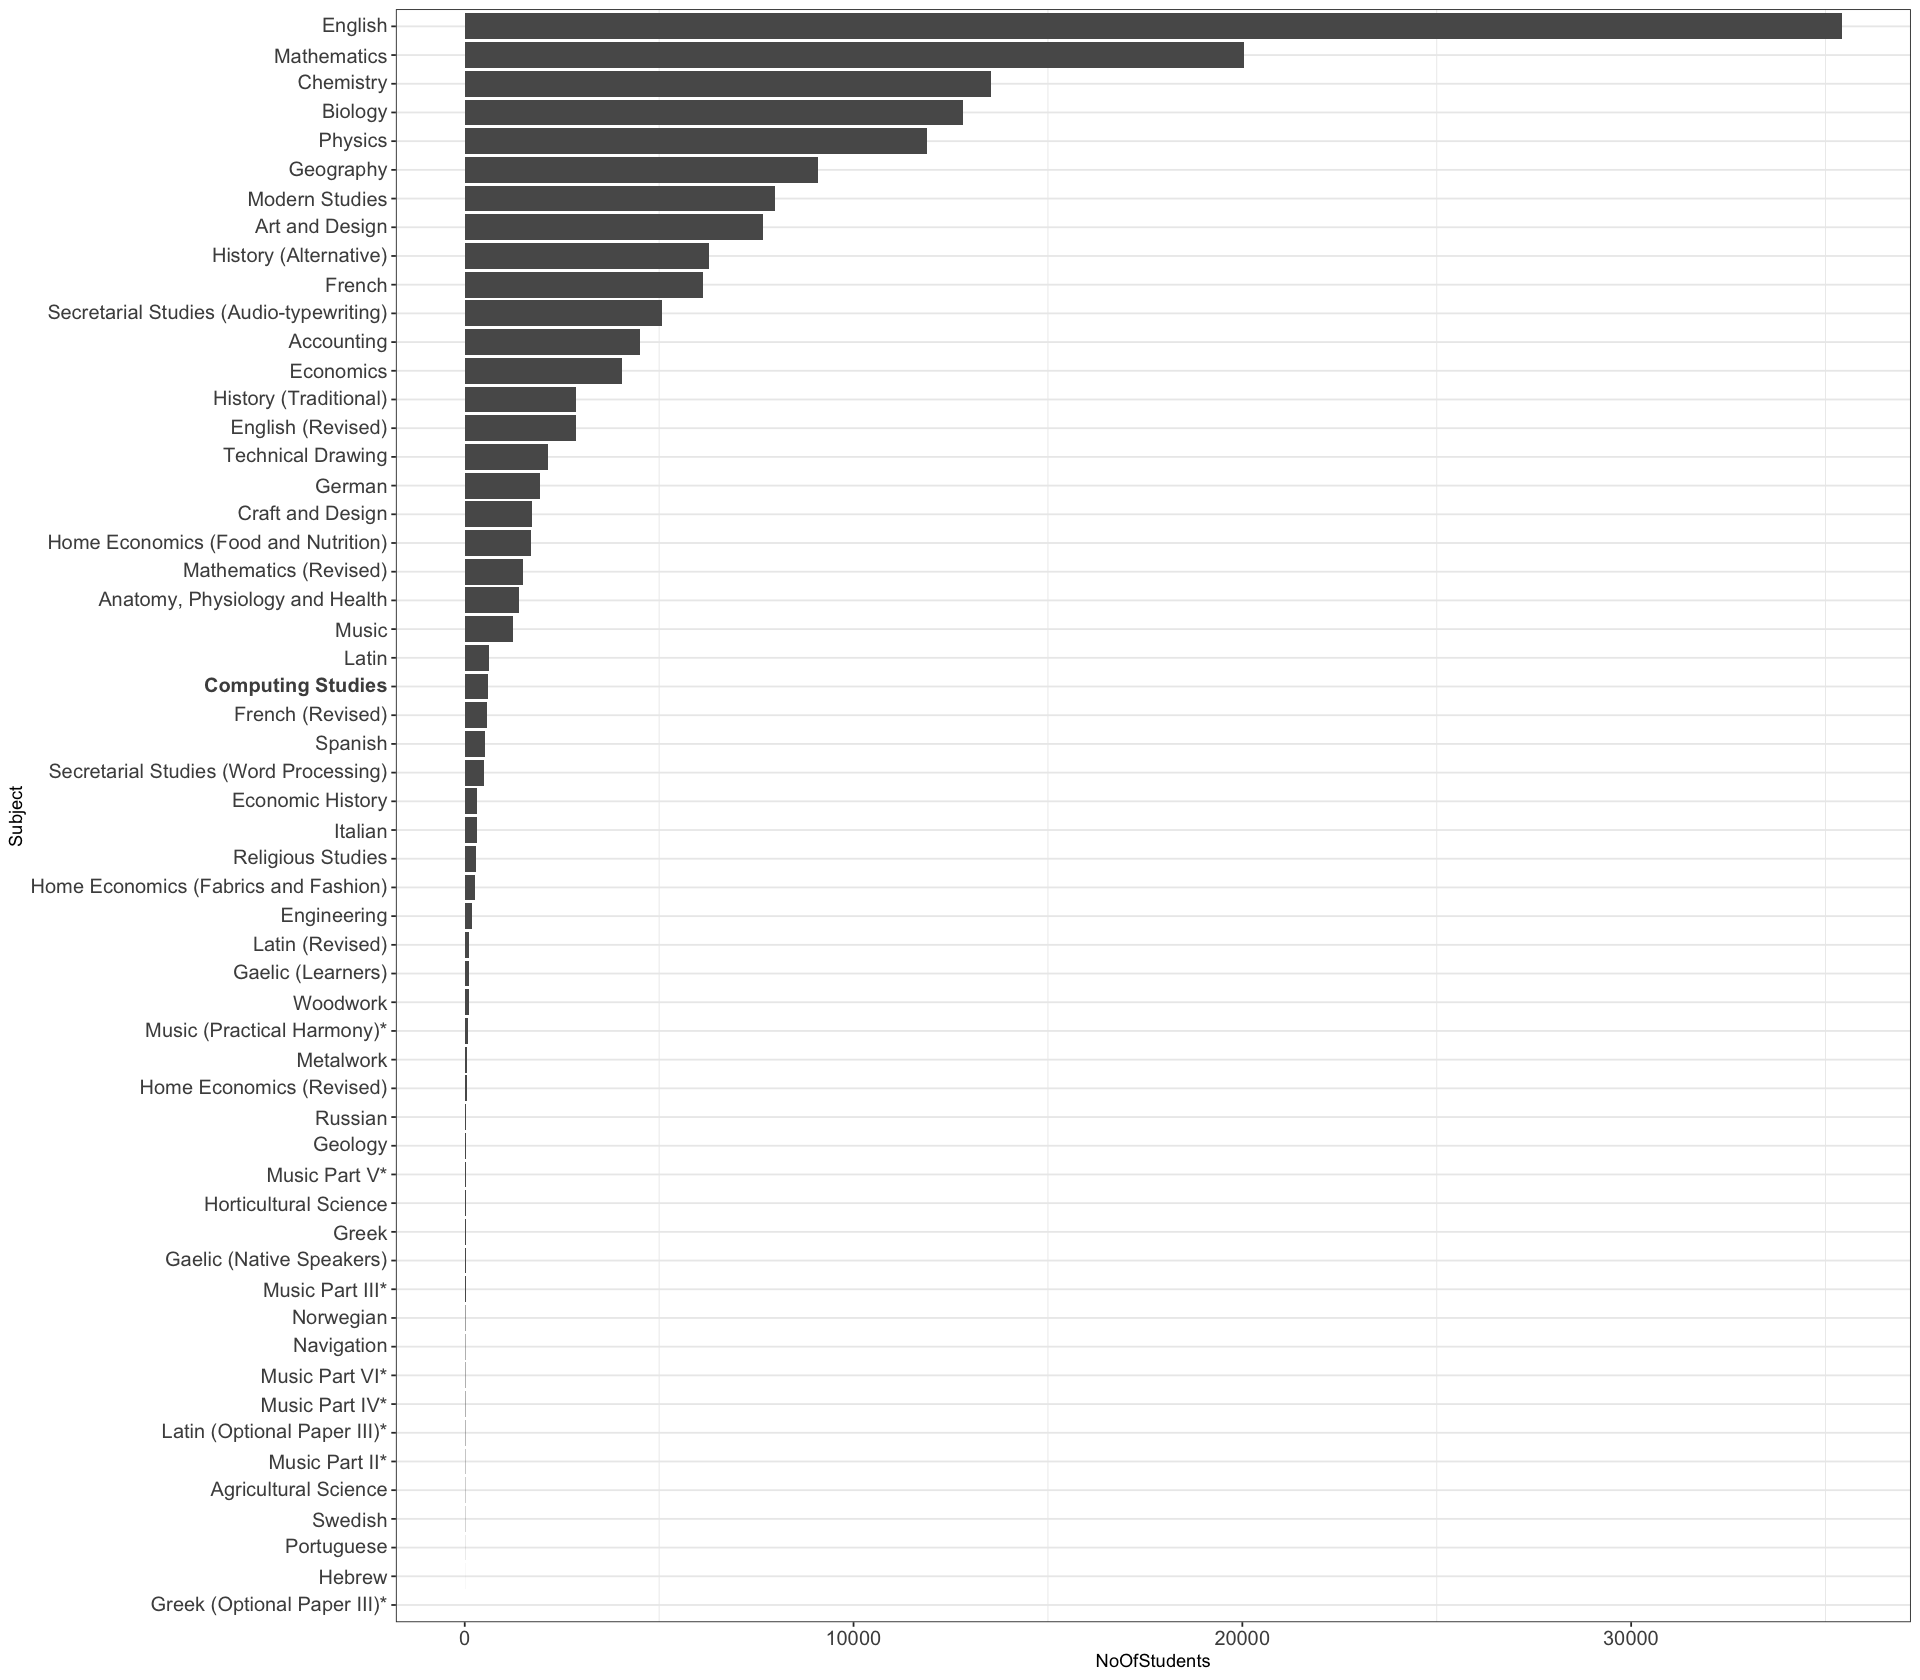

In [573]:
# todo - highlight label for subject of interest - bold works but colour coding not aligning properly
# also need to move to auto-generating the font face

options(repr.plot.width = 16, 
        repr.plot.height = 14)


higher_1989 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot...

    ggplot(aes(y = fct_reorder(Subject, NoOfStudents), x = NoOfStudents)) +
        geom_col() +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        ylab("Subject") +
        dressCodeTheme 


In [578]:
# using percentages to get a better picture of distribution
# this turned out to be a good thing as it highlighted an error in the data - error check included below

# percentage of total gender-wise
head(higher_1989, 10) %>%

    mutate_at(vars(starts_with("male") & !ends_with("-Entries")), ~(. / `male-Entries`)) %>%
    mutate_at(vars(starts_with("female") & !ends_with("-Entries")), ~(. / `female-Entries`)) %>%
    mutate_at(vars(starts_with("all") & !ends_with("-Entries")), ~(. / `all-Entries`))
    

# percentage of total entries by grade and gender
head(higher_1989, 10) %>%

    mutate_at(vars(starts_with("male")), ~(. / `all-Entries`)) %>%
    mutate_at(vars(starts_with("female")), ~(. / `all-Entries`)) %>%
    select(-(starts_with("all") & !ends_with("-Entries")))



Subject,male-Entries,male-NoAward,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-NoAward,⋯,female-Passes,female-D,all-Entries,all-NoAward,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Accounting,1994,0.12186560,0.09227683,0.2241725,0.3465396,0.6629890,0.2151454,2509,0.13072937,⋯,0.6217617,0.24750897,4503,0.12680435,0.08261159,0.2034199,0.3539862,0.6400178,0.2331779,432
Agricultural Science,4,0.00000000,0.50000000,0.2500000,0.2500000,1.0000000,NA,3,0.00000000,⋯,1.0000000,NA,7,0.00000000,0.42857143,0.1428571,0.4285714,1.0000000,NA,2
"Anatomy, Physiology and Health",239,0.23849372,0.07531381,0.1548117,0.3054393,0.5355649,0.2259414,1149,0.20887728,⋯,0.5483029,0.24281984,1388,0.21397695,0.06484150,0.1750720,0.3061960,0.5461095,0.2399135,179
Art and Design,2890,0.06332180,0.08027682,0.2190311,0.4245675,0.7238754,0.2128028,4776,0.03538526,⋯,0.8218174,0.14279732,7666,0.04591704,0.10540047,0.2651970,0.4142969,0.7848943,0.1691886,512
Biology,4275,0.12725146,0.13637427,0.2615205,0.2774269,0.6753216,0.1974269,8552,0.13131431,⋯,0.6370440,0.23164172,12827,0.12996024,0.11195135,0.2394169,0.2984330,0.6498012,0.2202386,536
Chemistry,7523,0.10487837,0.16482786,0.2456467,0.2889805,0.6994550,0.1956666,6001,0.11114814,⋯,0.6643893,0.22446259,13524,0.10766046,0.14256137,0.2419403,0.2993937,0.6838953,0.2084442,497
Computing Studies,469,0.20682303,0.12366738,0.1812367,0.3091684,0.6140725,0.1791045,124,0.21774194,⋯,0.5241935,0.25806452,593,0.20910624,0.11467116,0.1804384,0.3001686,0.5952782,0.1956155,70
Craft and Design,1579,0.15389487,0.09373021,0.2305256,0.3198227,0.6440785,0.2020266,158,0.12658228,⋯,0.6645570,0.20886076,1737,0.15141048,0.08981002,0.2314335,0.3246978,0.6459413,0.2026482,307
Economic History,155,0.09032258,0.08387097,0.4774194,0.2451613,0.8064516,0.1032258,152,0.09868421,⋯,0.8026316,0.09868421,307,0.09446254,0.09771987,0.4397394,0.2671010,0.8045603,0.1009772,33


Subject,male-Entries,male-NoAward,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-NoAward,female-A,female-B,female-C,female-Passes,female-D,all-Entries,NumberOfCentres
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
Accounting,0.4428159,0.05396402,0.04086165,0.09926716,0.15345325,0.29358206,0.09526982,0.55718410,0.07284033,0.041749944,0.10415279,0.20053298,0.34643571,0.13790806,4503,432
Agricultural Science,0.5714286,0.00000000,0.28571429,0.14285714,0.14285714,0.57142857,NA,0.42857143,0.00000000,0.142857143,NA,0.28571429,0.42857143,NA,7,2
"Anatomy, Physiology and Health",0.1721902,0.04106628,0.01296830,0.02665706,0.05259366,0.09221902,0.03890490,0.82780980,0.17291066,0.051873199,0.14841499,0.25360231,0.45389049,0.20100865,1388,179
Art and Design,0.3769893,0.02387164,0.03026350,0.08257240,0.16005740,0.27289330,0.08022437,0.62301070,0.02204540,0.075136968,0.18262458,0.25423950,0.51200104,0.08896426,7666,512
Biology,0.3332814,0.04241054,0.04545100,0.08715990,0.09246121,0.22507211,0.06579871,0.66671864,0.08754970,0.066500351,0.15225696,0.20597178,0.42472909,0.15443985,12827,536
Chemistry,0.5562703,0.05834073,0.09168885,0.13664596,0.16075126,0.38908607,0.10884354,0.44372967,0.04931973,0.050872523,0.10529429,0.13864241,0.29480923,0.09960071,13524,497
Computing Studies,0.7908938,0.16357504,0.09780776,0.14333895,0.24451939,0.48566610,0.14165261,0.20910624,0.04553120,0.016863406,0.03709949,0.05564924,0.10961214,0.05396290,593,70
Craft and Design,0.9090386,0.13989637,0.08520438,0.20955671,0.29073115,0.58549223,0.18364997,0.09096143,0.01151410,0.004605642,0.02187680,0.03396661,0.06044905,0.01899827,1737,307
Economic History,0.5048860,0.04560261,0.04234528,0.24104235,0.12377850,0.40716612,0.05211726,0.49511401,0.04885993,0.055374593,0.19869707,0.14332248,0.39739414,0.04885993,307,33


Warning message:
“Removed 5 rows containing missing values (position_stack).”
Warning message:
“Removed 5 rows containing missing values (position_stack).”


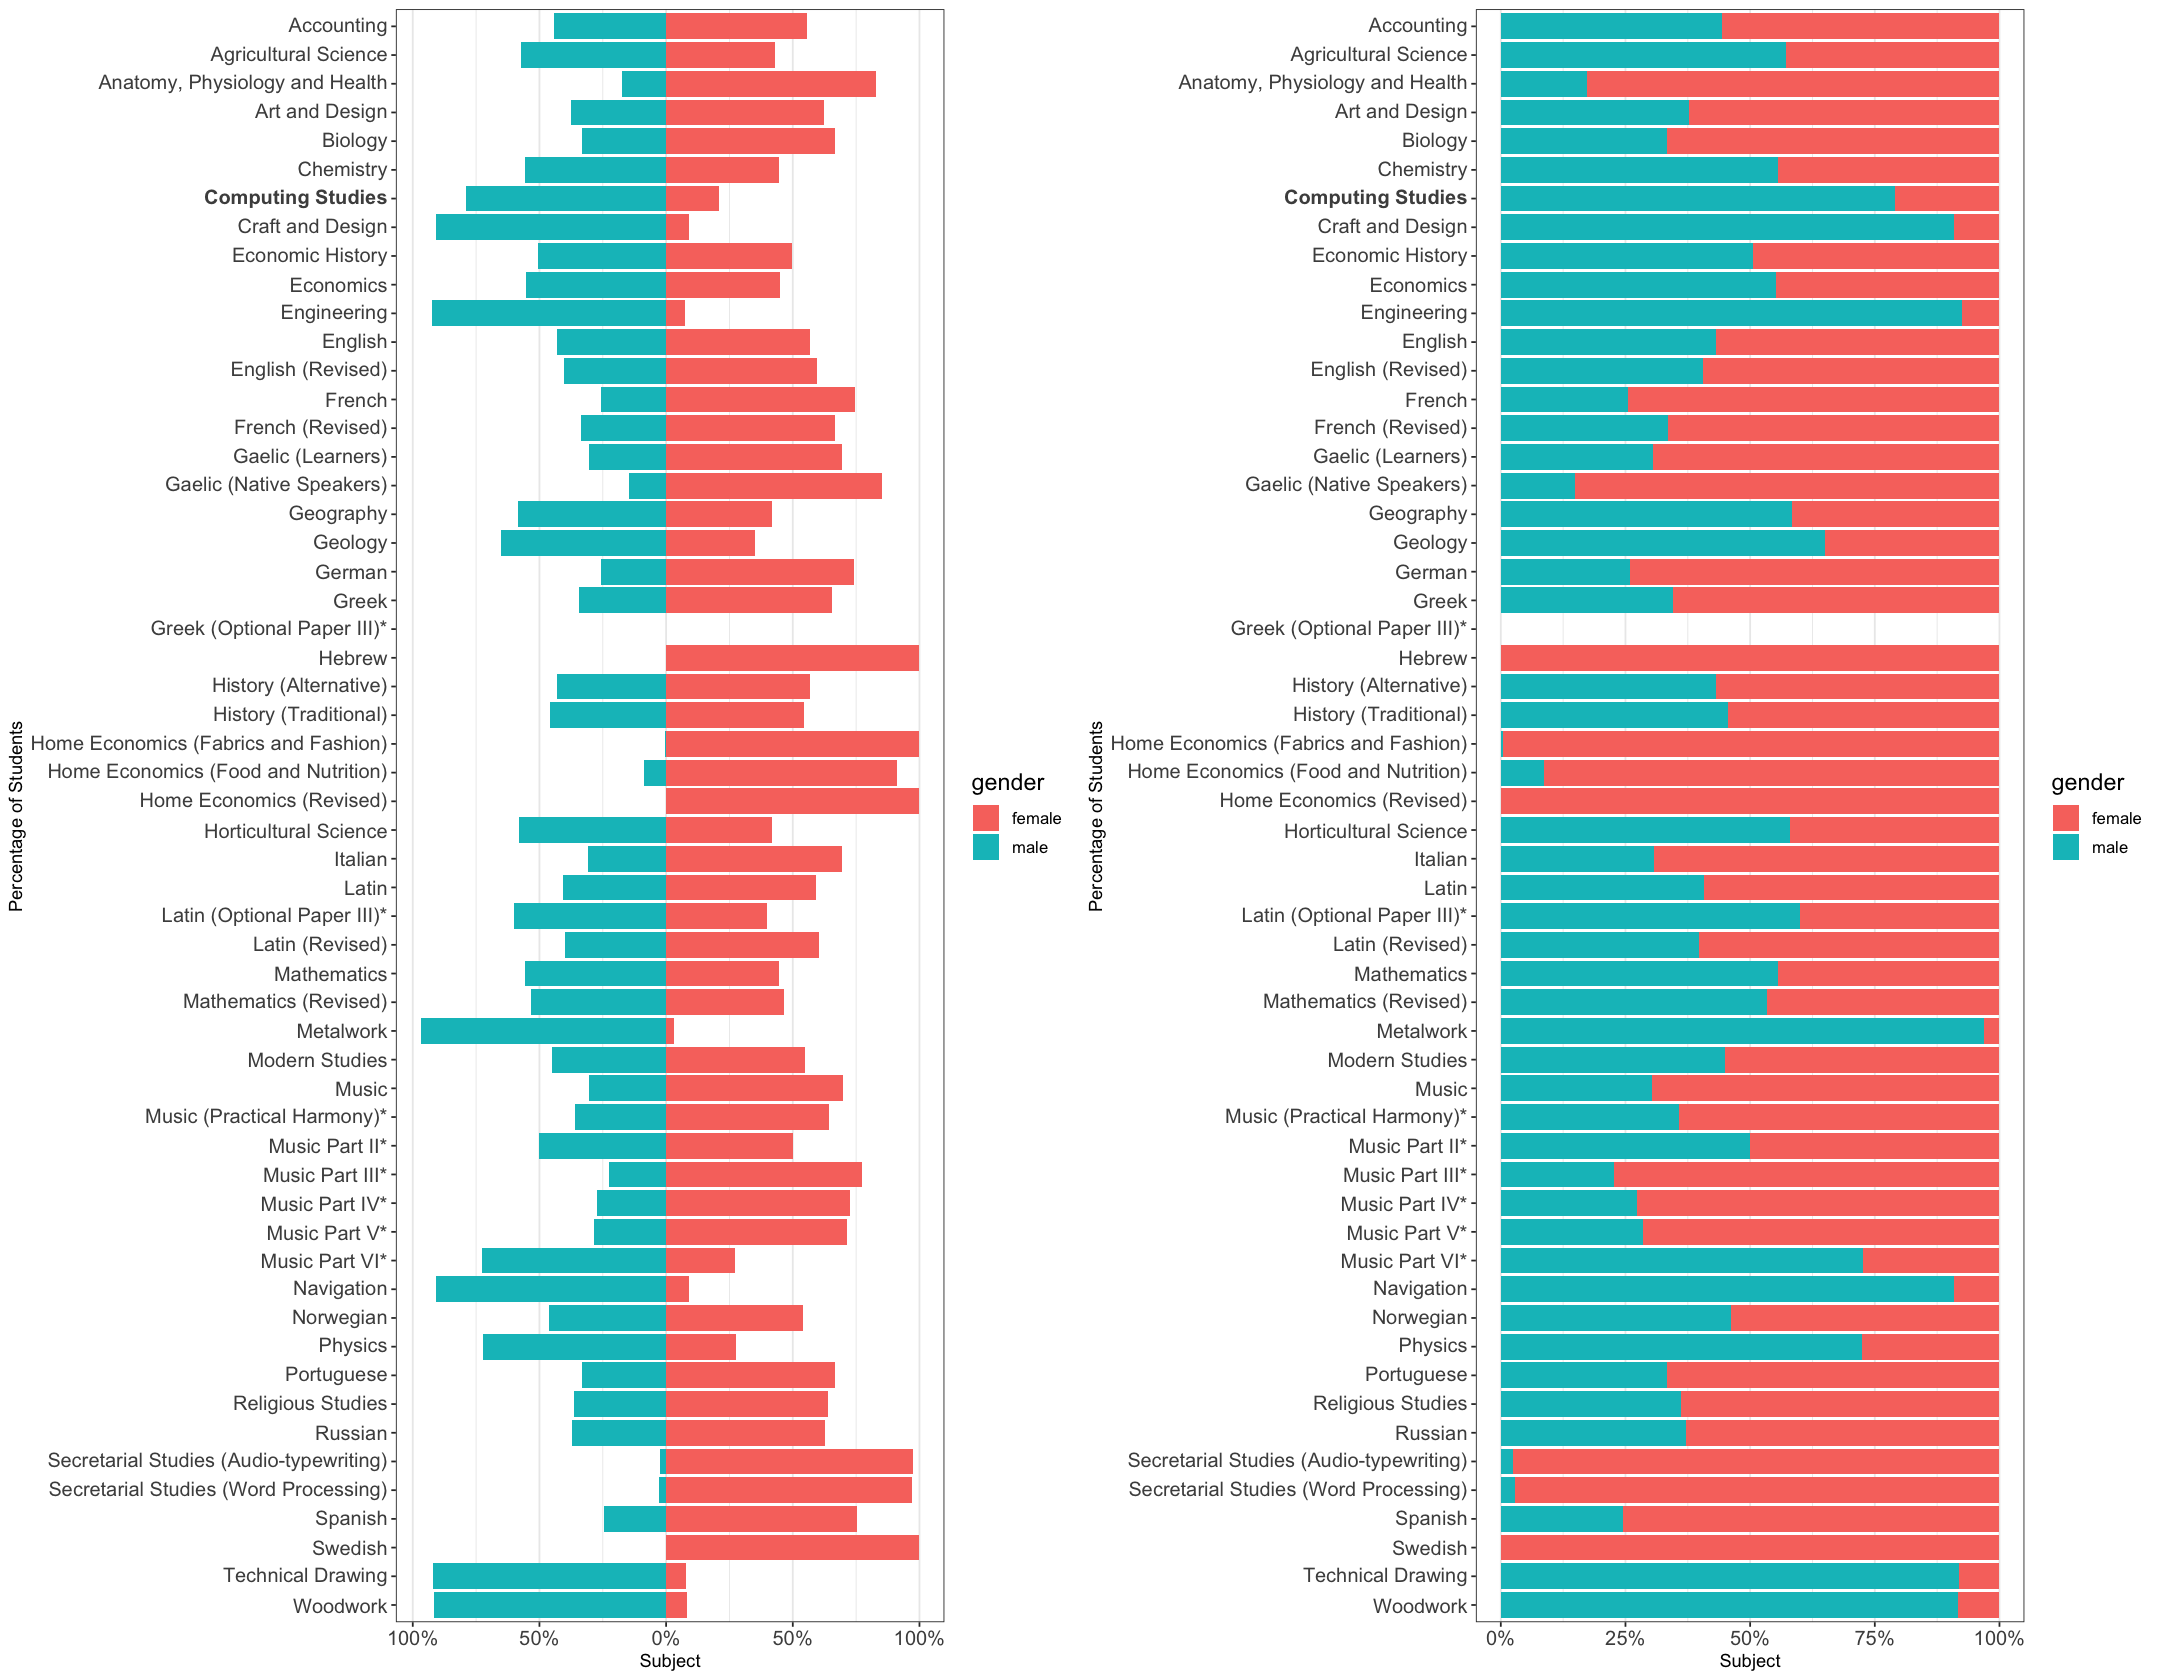

In [579]:
# upside-down, really, but having to flip gender order for consistency with next

tmp_df <- higher_1989 %>%

    mutate_at(vars(starts_with("male")), ~(. / `all-Entries`)) %>%
    mutate_at(vars(starts_with("female")), ~(. / `all-Entries`)) %>%
    select(-(starts_with("all") & !ends_with("-Entries"))) %>%

    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "PercentageOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter(!(gender %in% c("all")) & (grade %in% c("Entries"))) 


plot1 <- tmp_df %>%   

    ggplot(aes(y = reorder(Subject, desc(Subject), na.rm = T), x = if_else(gender == "male", -PercentageOfStudents, PercentageOfStudents), fill = gender, na.rm = T)) +
        geom_col() +
        ylab("Percentage of Students") + xlab("Subject") +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        scale_x_continuous(labels = function(x) scales::percent(abs(x))) + #scale_y_continuous(labels = function(n) scales::comma(abs(n))) +
        dressCodeTheme +
        theme(panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_line())
        

                           
plot2 <- tmp_df %>%
    # mutate(gender = fct_rev(gender)) %>% - but need to manually set fill to get this to work properly

    ggplot(aes(y = reorder(Subject, desc(Subject), na.rm = T), x = PercentageOfStudents, fill = gender, na.rm = T)) +
        geom_col() +
        ylab("Percentage of Students") + xlab("Subject") +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                      "Computing Studies" = expression(bold("Computing Studies")),
                                    parse = TRUE)) +
        scale_x_continuous(labels = function(x) scales::percent(abs(x))) + #scale_y_continuous(labels = function(n) scales::comma(abs(n))) +
        scale_fill_discrete(limits = rev(levels("gender"))) + 
        dressCodeTheme +
        theme(panel.grid.major.y = element_blank(),
              panel.grid.major.x = element_line())
                                   
                           
options(repr.plot.width = 18, repr.plot.height = 14)
gridExtra::grid.arrange(plot1, plot2, nrow = 1)    

rm(tmp_df)

<br /> &nbsp;<br />
<h3>1990</h3>

<br /> &nbsp;<br />


In [614]:
higher_1990 <- read_csv("sta_it_402/data/grades/1990_Higher.csv", trim_ws = T) %>% 
                            drop_na()

glimpse(higher_1990)
head(higher_1990)


── Column specification ───────────────────────────────────────────────────────────────────
cols(
  .default = col_character()
)
ℹ Use `spec()` for the full column specifications.




Rows: 58
Columns: 20
$ Subject          <chr> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <chr> "2,025", "6", "201", "30", "2,861", "4,004", "6,782"…
$ `male-A`         <chr> "190", "2", "14", "2", "199", "531", "1,106", "131",…
$ `male-B`         <chr> "486", "3", "39", "7", "643", "977", "1,624", "207",…
$ `male-C`         <chr> "616", "-", "58", "14", "1,312", "1,178", "2,039", "…
$ `male-Passes`    <chr> "1,292", "5", "111", "23", "2,154", "2,686", "4,769"…
$ `male-D`         <chr> "372", "-", "43", "5", "536", "915", "1,374", "225",…
$ `female-Entries` <chr> "2,268", "2", "966", "48", "4,444", "8,238", "5,346"…
$ `female-A`       <chr> "196", "-", "65", "12", "541", "794", "591", "15", "…
$ `female-B`       <chr> "560", "1", "190", "16", "1,235", "1,800", "1,209", …
$ `female-C`       <chr> "725", "1", "278", "12", "1,905", "2,606", "1,778", …
$ `female-Passes`  <chr> "1,481", "2", "533", "40", "3,681", "5,200", "3,578"…
$ `female-D`       <chr> "464",

Subject,male-Entries,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-A,female-B,female-C,female-Passes,female-D,all-Entries,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Accounting,"2,025",190,486,616,"1,292",372,"2,268",196,560,725,"1,481",464,"4,293",386,"1,046","1,341","2,773",836,426
Agricultural Science,6,2,3,-,5,-,2,-,1,1,2,-,8,2,4,1,7,-,6
"Anatomy, Physiology and Health",201,14,39,58,111,43,966,65,190,278,533,237,"1,167",79,229,336,644,280,175
Art and Design (Revised),30,2,7,14,23,5,48,12,16,12,40,6,78,14,23,26,63,11,10
Art and Design,"2,861",199,643,"1,312","2,154",536,"4,444",541,"1,235","1,905","3,681",589,"7,305",740,"1,878","3,217","5,835","1,125",491
Biology,"4,004",531,977,"1,178","2,686",915,"8,238",794,"1,800","2,606","5,200","1,986","12,242","1,325","2,777","3,784","7,886","2,901",537


In [615]:
higher_1990 <- higher_1990 %>%
    mutate_at(c("Subject"), as.factor) %>%
    mutate_at(c("NumberOfCentres"), as.integer) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.character) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), parse_number) %>%
    mutate_at(vars(starts_with("male-") | starts_with("female-") | starts_with("all-")), as.integer) 

glimpse(higher_1990)     
head(higher_1990)

Warning message:
“Problem with `mutate()` input `NumberOfCentres`.
ℹ NAs introduced by coercion
ℹ Input `NumberOfCentres` is `.Primitive("as.integer")(NumberOfCentres)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `male-Entries`.
ℹ 1 parsing failure.
row col expected actual
 23  -- a number      -

ℹ Input `male-Entries` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“1 parsing failure.
row col expected actual
 23  -- a number      -
”
Warning message:
“Problem with `mutate()` input `male-A`.
ℹ 12 parsing failures.
row col expected actual
 23  -- a number      -
 28  -- a number      -
 29  -- a number      -
 33  -- a number      -
 38  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `male-A` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“12 parsing 

Warning message:
“Problem with `mutate()` input `all-B`.
ℹ 9 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-B` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_ws = TRUE) ...`.”
Warning message:
“9 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.
”
Warning message:
“Problem with `mutate()` input `all-C`.
ℹ 11 parsing failures.
row col expected actual
 23  -- a number      -
 25  -- a number      -
 33  -- a number      -
 40  -- a number      -
 41  -- a number      -
... ... ........ ......
See problems(...) for more details.

ℹ Input `all-C` is `(function (x, na = c("", "NA"), locale = default_locale(), trim_w

Rows: 58
Columns: 20
$ Subject          <fct> "Accounting", "Agricultural Science", "Anatomy, Phys…
$ `male-Entries`   <int> 2025, 6, 201, 30, 2861, 4004, 6782, 1089, 148, 1286,…
$ `male-A`         <int> 190, 2, 14, 2, 199, 531, 1106, 131, 14, 112, 19, 314…
$ `male-B`         <int> 486, 3, 39, 7, 643, 977, 1624, 207, 30, 270, 52, 582…
$ `male-C`         <int> 616, NA, 58, 14, 1312, 1178, 2039, 299, 42, 413, 34,…
$ `male-Passes`    <int> 1292, 5, 111, 23, 2154, 2686, 4769, 637, 86, 795, 10…
$ `male-D`         <int> 372, NA, 43, 5, 536, 915, 1374, 225, 41, 274, 9, 402…
$ `female-Entries` <int> 2268, 2, 966, 48, 4444, 8238, 5346, 313, 19, 155, 12…
$ `female-A`       <int> 196, NA, 65, 12, 541, 794, 591, 15, 1, 13, 8, 131, 2…
$ `female-B`       <int> 560, 1, 190, 16, 1235, 1800, 1209, 51, 3, 42, 44, 35…
$ `female-C`       <int> 725, 1, 278, 12, 1905, 2606, 1778, 89, 6, 49, 48, 57…
$ `female-Passes`  <int> 1481, 2, 533, 40, 3681, 5200, 3578, 155, 10, 104, 10…
$ `female-D`       <int> 464, N

Subject,male-Entries,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-A,female-B,female-C,female-Passes,female-D,all-Entries,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Accounting,2025,190,486,616,1292,372,2268,196,560,725,1481,464,4293,386,1046,1341,2773,836,426
Agricultural Science,6,2,3,NA,5,NA,2,NA,1,1,2,NA,8,2,4,1,7,NA,6
"Anatomy, Physiology and Health",201,14,39,58,111,43,966,65,190,278,533,237,1167,79,229,336,644,280,175
Art and Design (Revised),30,2,7,14,23,5,48,12,16,12,40,6,78,14,23,26,63,11,10
Art and Design,2861,199,643,1312,2154,536,4444,541,1235,1905,3681,589,7305,740,1878,3217,5835,1125,491
Biology,4004,531,977,1178,2686,915,8238,794,1800,2606,5200,1986,12242,1325,2777,3784,7886,2901,537


In [616]:
tmp_df <- higher_1990 %>%
    select(-matches(redundant_column_flags)) 
tmp_df[is.na(tmp_df)] <- 0

higher_1990 <- bind_cols(higher_1990,
        
    tmp_df %>%
        mutate("male-NoAward" = (`male-Entries` - reduce(select(., (starts_with("male") & !ends_with("-Entries"))), `+`)), # rowSums(select(., starts_with("male-")))
               "female-NoAward" = (`female-Entries` - reduce(select(., (starts_with("female") & !ends_with("-Entries"))), `+`)), 
               "all-NoAward" = (`all-Entries` - reduce(select(., (starts_with("all") & !ends_with("-Entries"))), `+`))) %>%
        select(c("male-NoAward", "female-NoAward", "all-NoAward"))
    ) %>%

    relocate(`male-NoAward`, .after = `male-Entries`) %>%
    relocate(`female-NoAward`, .after = `female-Entries`) %>%
    relocate(`all-NoAward`, .after = `all-Entries`) 

tail(higher_1990)
rm(tmp_df)


Subject,male-Entries,male-NoAward,male-A,male-B,male-C,male-Passes,male-D,female-Entries,female-NoAward,⋯,female-Passes,female-D,all-Entries,all-NoAward,all-A,all-B,all-C,all-Passes,all-D,NumberOfCentres
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Secretarial Studies (Audio-typewriting),110,19,7,17,42,66,25,3425,434,⋯,2308,683,3535,453,329,842,1203,2374,708,314
Secretarial Studies (Word Processing),46,9,2,10,16,28,9,1268,126,⋯,881,261,1314,135,126,368,415,909,270,117
Spanish,148,14,34,42,42,118,16,437,37,⋯,340,60,585,51,122,162,174,458,76,139
Swedish,4,0,2,2,NA,4,NA,7,0,⋯,7,NA,11,0,8,3,NA,11,NA,9
Technical Drawing,1649,248,134,331,526,991,410,168,34,⋯,86,48,1817,282,147,355,575,1077,458,361
Woodwork,30,4,3,6,12,21,5,1,0,⋯,1,NA,31,4,3,6,13,22,5,16


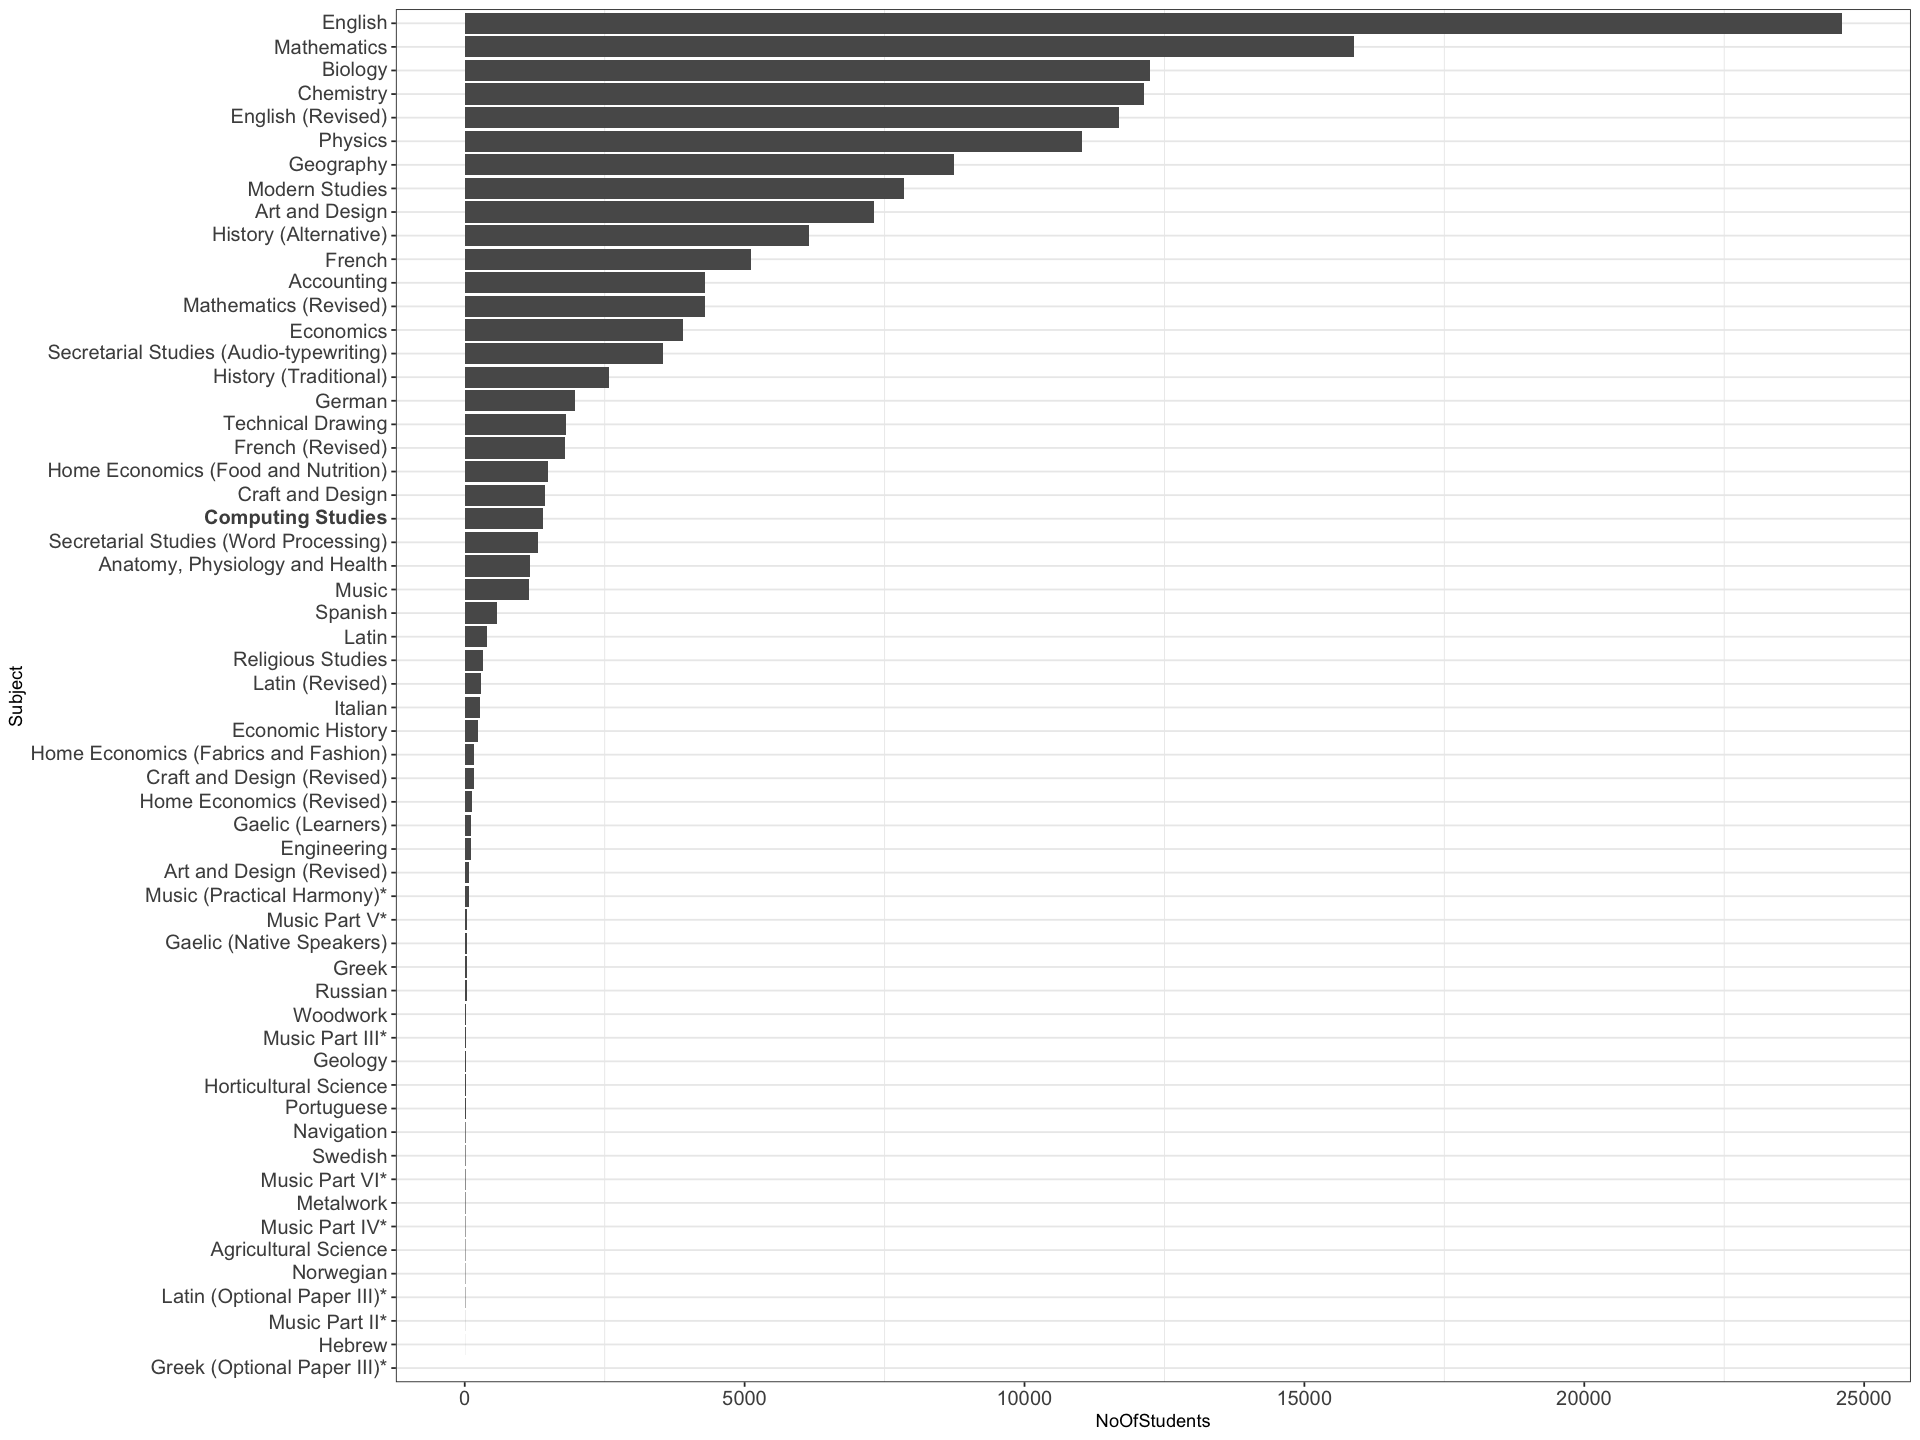

In [620]:
options(repr.plot.width = 16, 
        repr.plot.height = 12)


higher_1990 %>%
    pivot_longer(!c(Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>%
    arrange(gender, desc(NoOfStudents)) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    ggplot(aes(y = fct_reorder(Subject, NoOfStudents), x = NoOfStudents)) +
        geom_col() +
        ylab("Subject") +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        dressCodeTheme 


In [104]:
head(higher_1989) %>%
    mutate(year = 1989) %>%

full_join(head(higher_1990) %>%
            mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade", "year"), as.factor) %>%
    filter((grade %in% c("Entries"))) %>%
    arrange(Subject, year)

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-1", "male-2", "male-3", "male-4", "male-5", "female-Entries", "female-NoAward", "female-1", "female-2", "female-3", "female-4", "female-5", "all-Entries", "all-NoAward", "all-1", "all-2", "all-3", "all-4", "all-5", "NumberOfCentres", "year")



year,Subject,NumberOfCentres,gender,grade,NoOfStudents
<fct>,<fct>,<int>,<fct>,<fct>,<int>
1986,Accounting,474,male,Entries,3864
1986,Accounting,474,female,Entries,6390
1986,Accounting,474,all,Entries,10254
1987,Accounting,481,male,Entries,4124
1987,Accounting,481,female,Entries,6785
1987,Accounting,481,all,Entries,10909
1986,Agricultural Science,12,male,Entries,88
1986,Agricultural Science,12,female,Entries,12
1986,Agricultural Science,12,all,Entries,100


Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year")



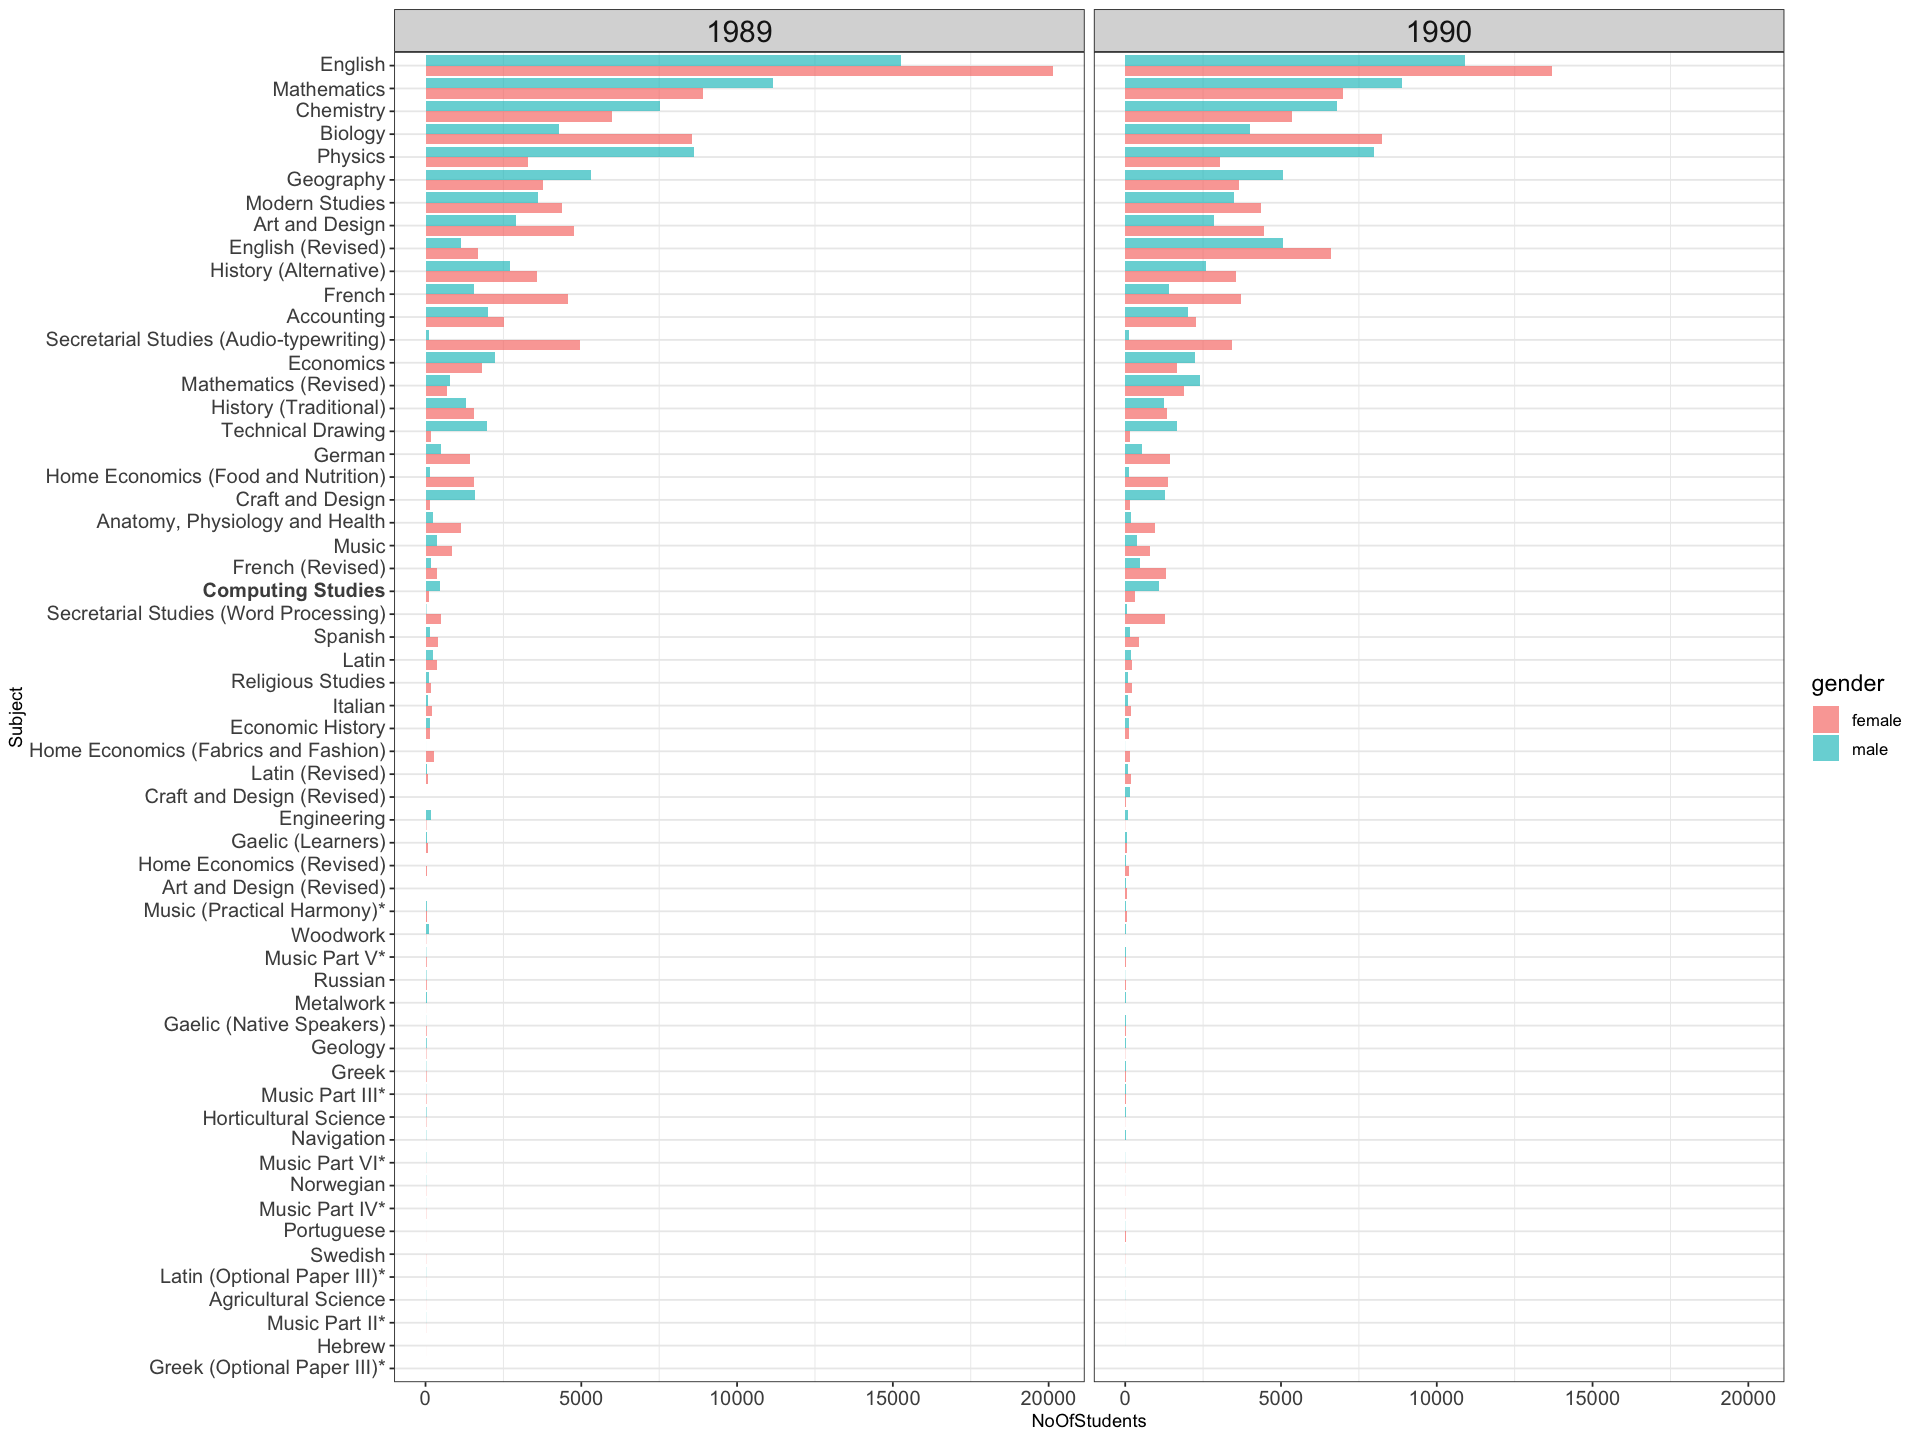

In [621]:
higher_1989 %>%
    mutate(year = 1989) %>%

full_join(higher_1990 %>%
            mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((!gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..


    ggplot(aes(y = reorder(Subject, NoOfStudents), x = NoOfStudents, fill = gender)) +
        geom_col(alpha = 0.65, position = "dodge", na.rm = T) +
        ylab("Subject") +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year")



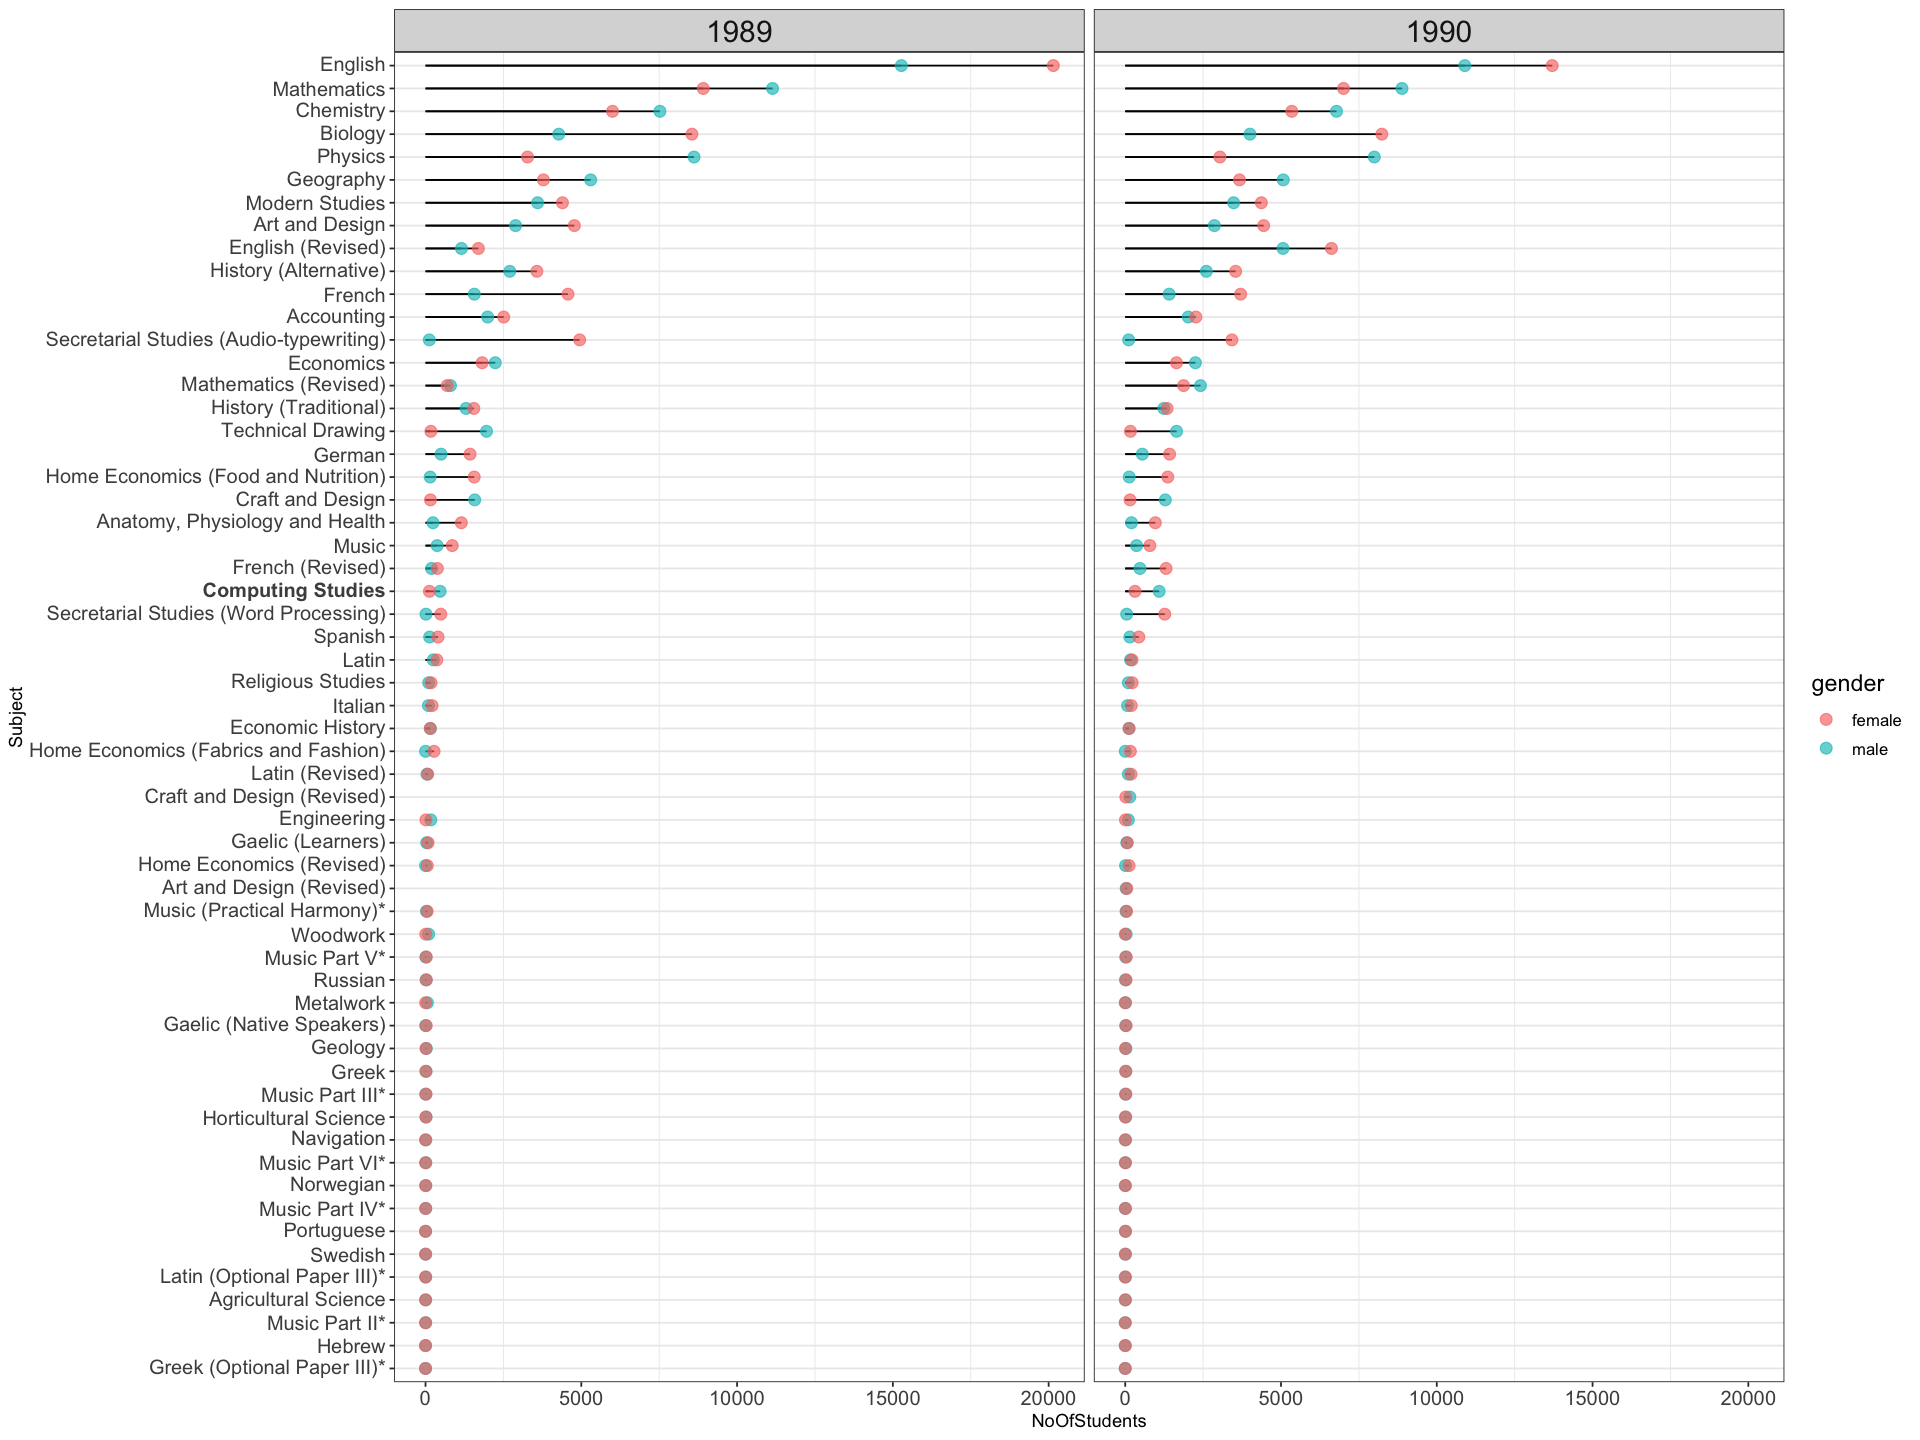

In [622]:
higher_1989 %>%
    mutate(year = 1989) %>%

full_join(higher_1990 %>%
            mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((!gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    ggplot(aes(y = reorder(Subject, NoOfStudents), x = NoOfStudents, fill = gender)) +
        geom_segment(aes(xend = 0, yend = Subject)) +
        geom_point(aes(colour = gender), size = 3, alpha = 0.65, na.rm = T) +
        ylab("Subject") +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        dressCodeTheme + 
        facet_wrap(~ as.factor(year))
        

Joining, by = c("Subject", "male-Entries", "male-NoAward", "male-A", "male-B", "male-C", "male-Passes", "male-D", "female-Entries", "female-NoAward", "female-A", "female-B", "female-C", "female-Passes", "female-D", "all-Entries", "all-NoAward", "all-A", "all-B", "all-C", "all-Passes", "all-D", "NumberOfCentres", "year")



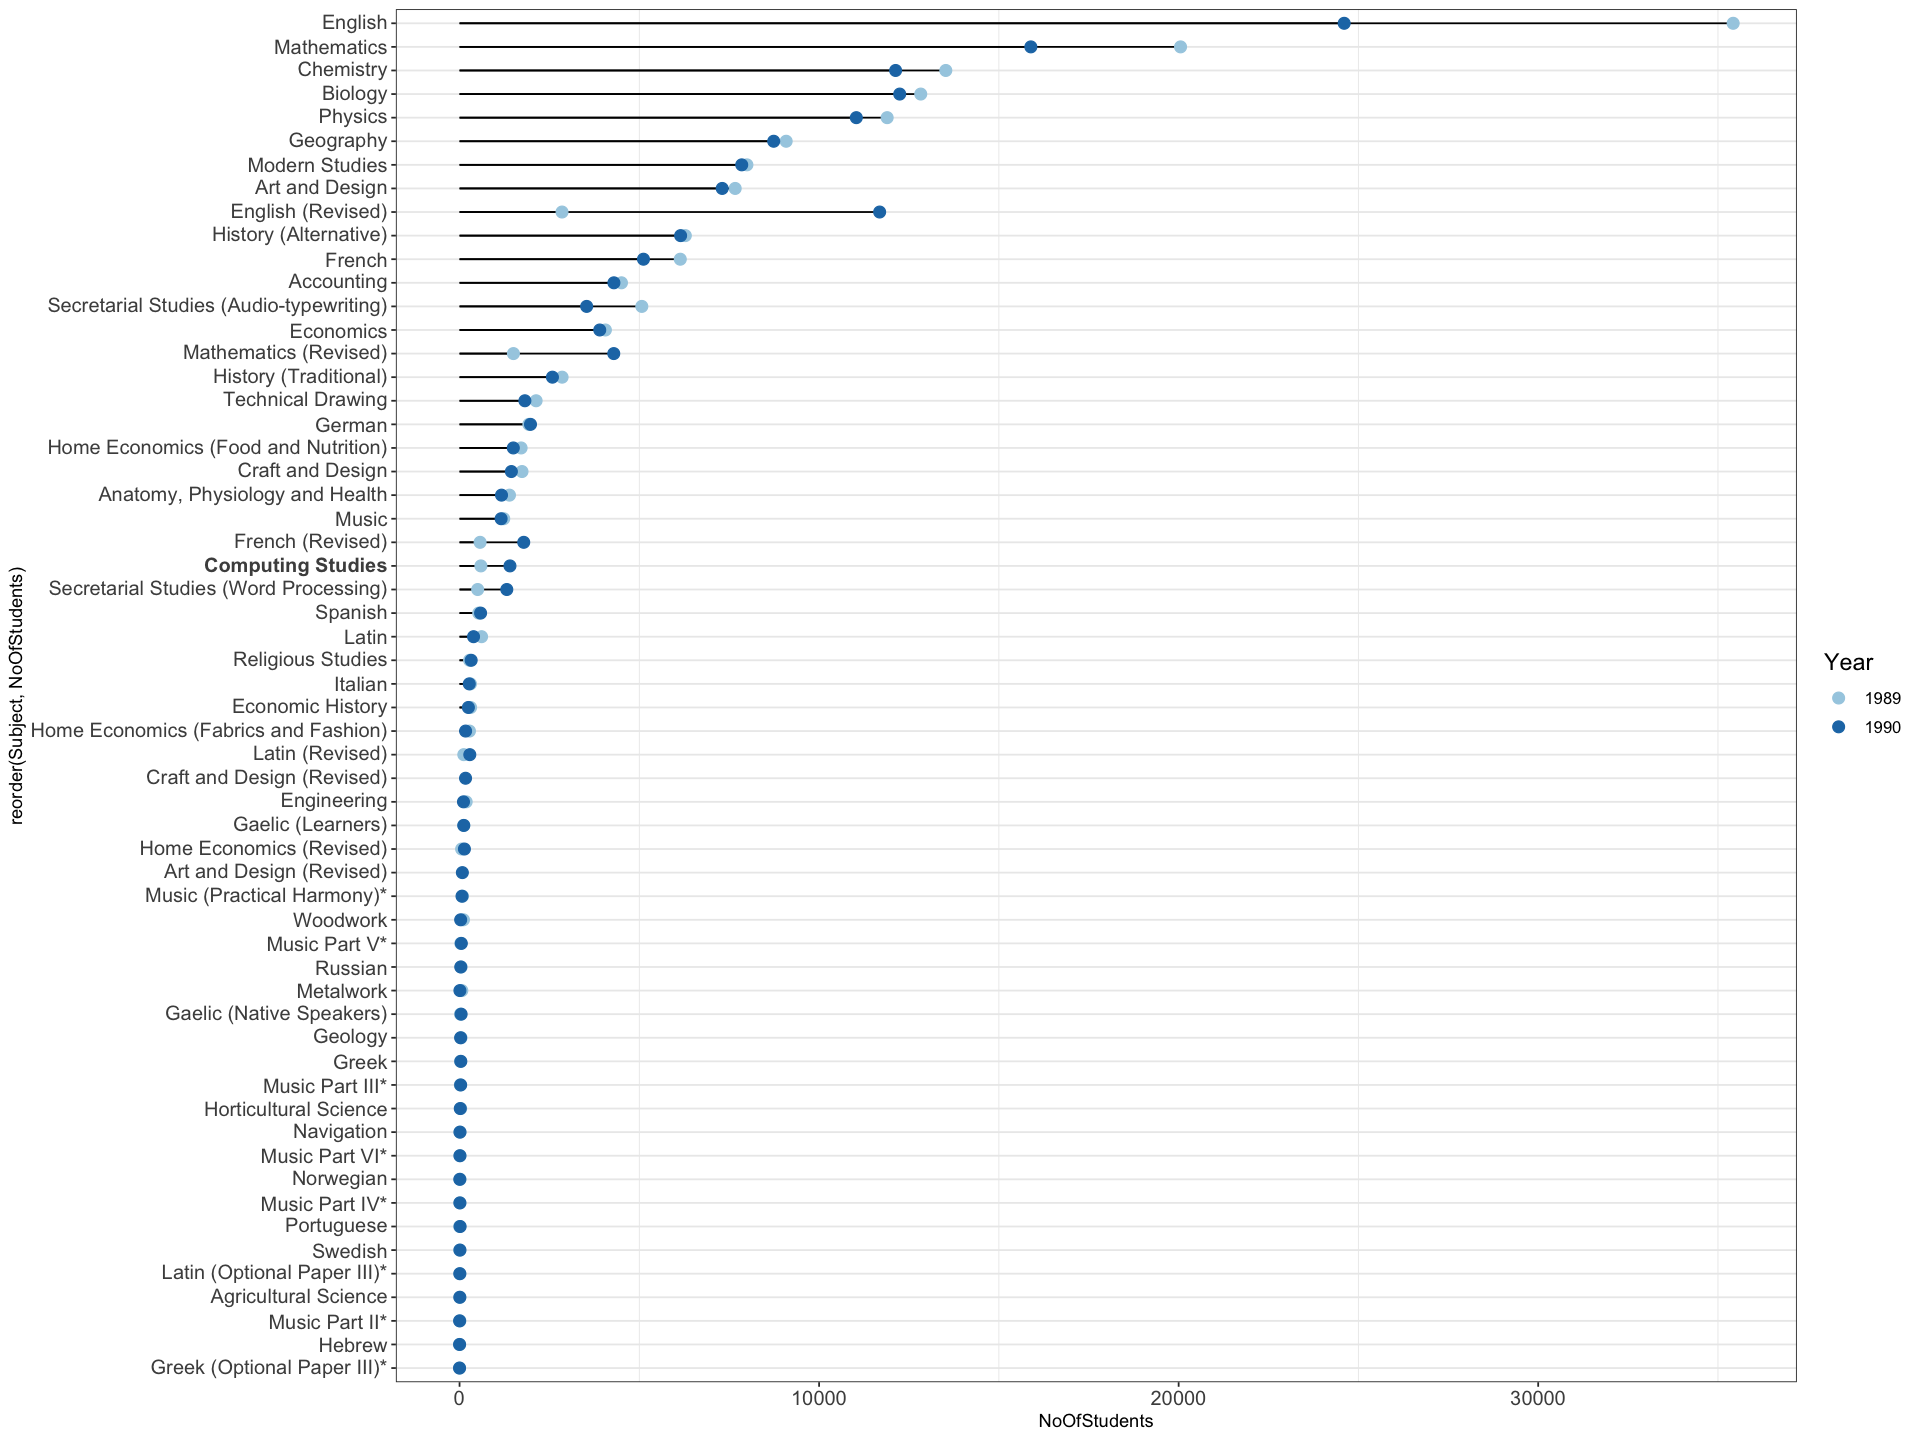

In [623]:
higher_1989 %>%
    mutate(year = 1989) %>%

full_join(higher_1990 %>%
            mutate(year = 1990)) %>%

    select(year, everything()) %>%
    pivot_longer(!c(year, Subject, NumberOfCentres), names_to = "grade", values_to = "NoOfStudents") %>%
    separate("grade", c("gender", "grade")) %>%
    mutate_at(c("gender", "grade"), as.factor) %>%
    filter((gender %in% c("all")) & (grade %in% c("Entries"))) %>% 
    arrange(Subject, year) %>%
    mutate(NoOfStudents = replace_na(NoOfStudents, 0)) %>% # instead of filter - want to keep labels in plot... and na.rm in fct_reorder is iffy ..

    ggplot(aes(y = reorder(Subject, NoOfStudents), x = NoOfStudents)) +
        geom_segment(aes(xend = 0, yend = Subject)) +
        geom_point(aes(colour = as.factor(year)), size = 3, na.rm = T) +
        scale_y_discrete(labels = c("Computing" = expression(bold(Computing)), 
                                    "Computing Studies" = expression(bold("Computing Studies")), 
                                    parse = TRUE)) +
        scale_colour_brewer(name = "Year", palette = "Paired") +
        dressCodeTheme 